In [2]:
pwd

'/mmfs1/scratch/dsu.local/bshakya/scratch/bshakya/RT-DETR/utils'

In [2]:
!python annotations_utils.py

Histogram saved as './output/plot_hist.png'
Figure(1000x600)


In [28]:
!python annotations_utils.py

Category ID 4: 28074 annotations
Category ID 5: 5771 annotations
Category ID 1: 21006 annotations
Category ID 9: 2940 annotations
Category ID 7: 530 annotations
Category ID 10: 5845 annotations
Category ID 2: 6376 annotations
Category ID 6: 2659 annotations
Category ID 11: 265 annotations
Category ID 0: 2180 annotations
Category ID 8: 599 annotations
Category ID 3: 1302 annotations


In [18]:
!python annotations_utils.py

Image with maximum bounding boxes: images/9999938_00000_d_0000207.jpg (461 bounding boxes)
Image with minimum bounding boxes: images/0000078_05939_d_0000016.jpg (1 bounding boxes)
Average bounding boxes per image: 46


In [20]:
!python annotations_utils.py

Image with maximum bounding boxes: 9999938_00000_d_0000207.jpg (498 bounding boxes)
Image with minimum bounding boxes: 0000078_05939_d_0000016.jpg (1 bounding boxes)
Average bounding boxes per image: 48


In [5]:
!python annotations_utils.py

9999963_00000_d_0000062.jpg: 24 bounding boxes
9999938_00000_d_0000470.jpg: 18 bounding boxes
0000310_03500_d_0000125.jpg: 13 bounding boxes
9999938_00000_d_0000147.jpg: 31 bounding boxes
9999938_00000_d_0000136.jpg: 38 bounding boxes
9999973_00000_d_0000096.jpg: 66 bounding boxes
9999979_00000_d_0000002.jpg: 67 bounding boxes
0000272_01500_d_0000004.jpg: 138 bounding boxes
9999938_00000_d_0000154.jpg: 19 bounding boxes
0000337_03500_d_0000043.jpg: 25 bounding boxes
9999952_00000_d_0000156.jpg: 39 bounding boxes
9999938_00000_d_0000391.jpg: 42 bounding boxes
9999938_00000_d_0000197.jpg: 56 bounding boxes
9999938_00000_d_0000312.jpg: 68 bounding boxes
9999986_00000_d_0000034.jpg: 16 bounding boxes
9999938_00000_d_0000240.jpg: 42 bounding boxes
9999952_00000_d_0000102.jpg: 71 bounding boxes
9999947_00000_d_0000005.jpg: 141 bounding boxes
9999952_00000_d_0000174.jpg: 24 bounding boxes
9999938_00000_d_0000050.jpg: 15 bounding boxes
9999993_00000_d_0000014.jpg: 112 bounding boxes
9999938_00

In [11]:
import os
import json
import numpy as np

def load_coco_json(path):
    """
    Loads a COCO format JSON file.
    
    Parameters:
    - path (str): Path to the JSON file.
    
    Returns:
    - dict: Parsed JSON content.
    """
    with open(path, 'r') as f:
        return json.load(f)

def categorize_images_by_density(coco_json_path):
    """
    Categorizes images in a COCO dataset as low, medium, and high density based on the bounding boxes count.
    
    The thresholds are derived from the median and mean of the bounding boxes count:
      - Low density: bounding box count < median
      - Medium density: median <= bounding box count < mean
      - High density: bounding box count >= mean
    
    Parameters:
    - coco_json_path (str): Path to the COCO JSON annotations file.
    
    Returns:
    - tuple: Three lists containing image dictionaries for each density category (low, medium, high).
    """
    
    # Load the dataset
    coco_data = load_coco_json(coco_json_path)
    images = coco_data.get("images", [])
    annotations = coco_data.get("annotations", [])
    
    # Initialize a dict to count the bboxes for each image id
    bbox_count = {img['id']: 0 for img in images}
    for ann in annotations:
        image_id = ann.get('image_id')
        if image_id in bbox_count:
            bbox_count[image_id] += 1
    
    # Gather counts to compute summary statistics
    counts = list(bbox_count.values())
    median_count = np.median(counts)
    mean_count = np.mean(counts)
    
    print(f"Total Images: {len(images)}")
    print(f"Median bounding box count: {median_count}")
    print(f"Mean bounding box count: {mean_count:.2f}")
    
    # Categorize images based on computed thresholds
    low_density = []
    medium_density = []
    high_density = []
    
    for img in images:
        image_id = img['id']
        count = bbox_count.get(image_id, 0)
        
        if count < median_count:
            low_density.append(img)
        elif count < mean_count:
            medium_density.append(img)
        else:
            high_density.append(img)
    
    print(f"Number of low density images: {len(low_density)}")
    print(f"Number of medium density images: {len(medium_density)}")
    print(f"Number of high density images: {len(high_density)}")
    
    return low_density, medium_density, high_density

# Example usage:
if __name__ == "__main__":
    coco_json_path = "../../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json"  # Replace with your COCO JSON file path
    low_imgs, med_imgs, high_imgs = categorize_images_by_density(coco_json_path)

    # Optionally, you can print out some file names or IDs for each category:
    print("\nSample of low density images:")
    for img in low_imgs[:5]:
        print(f"ID: {img['id']}, File: {img.get('file_name', 'N/A')}")
    
    print("\nSample of medium density images:")
    for img in med_imgs[:5]:
        print(f"ID: {img['id']}, File: {img.get('file_name', 'N/A')}")
    
    print("\nSample of high density images:")
    for img in high_imgs[:5]:
        print(f"ID: {img['id']}, File: {img.get('file_name', 'N/A')}")


Total Images: 1610
Median bounding box count: 36.0
Mean bounding box count: 46.65
Number of low density images: 795
Number of medium density images: 241
Number of high density images: 574

Sample of low density images:
ID: 1, File: images/9999973_00000_d_0000127.jpg
ID: 4, File: images/9999952_00000_d_0000054.jpg
ID: 6, File: images/9999963_00000_d_0000044.jpg
ID: 7, File: images/9999986_00000_d_0000036.jpg
ID: 11, File: images/9999952_00000_d_0000175.jpg

Sample of medium density images:
ID: 21, File: images/9999938_00000_d_0000283.jpg
ID: 24, File: images/9999973_00000_d_0000090.jpg
ID: 27, File: images/0000207_00300_d_0000004.jpg
ID: 29, File: images/9999938_00000_d_0000404.jpg
ID: 30, File: images/9999963_00000_d_0000075.jpg

Sample of high density images:
ID: 2, File: images/0000320_00300_d_0000004.jpg
ID: 3, File: images/0000184_00512_d_0000182.jpg
ID: 5, File: images/0000207_00700_d_0000008.jpg
ID: 8, File: images/9999952_00000_d_0000046.jpg
ID: 9, File: images/0000063_11000_d_0

Bounding Boxes Count Distribution:
  Min: 1
  20th Percentile: 18.00
  40th Percentile: 29.00
  60th Percentile: 43.00
  80th Percentile: 63.00
  Max: 461


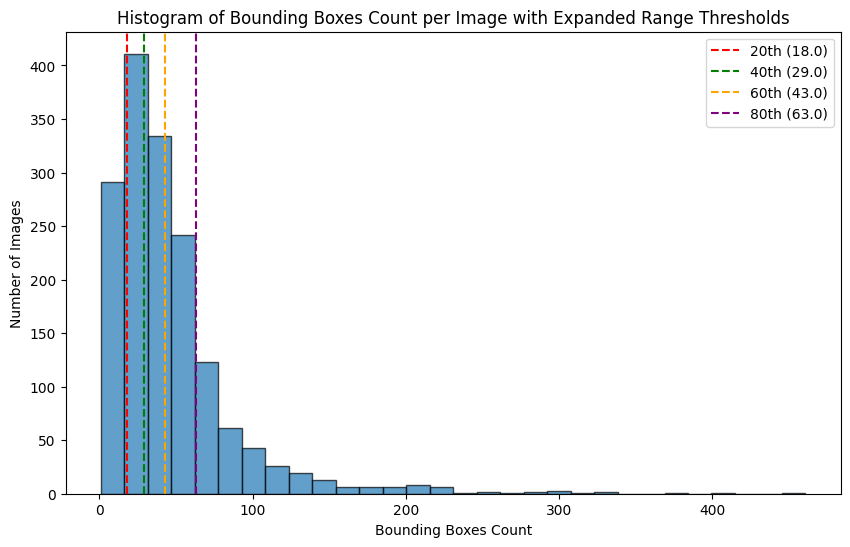


Categorization Results:
  Sparse: 315 images
  Low: 305 images
  Medium: 336 images
  High: 322 images
  Dense: 332 images

Sample Sparse Images:
  ID: 1, File: images/9999973_00000_d_0000127.jpg
  ID: 4, File: images/9999952_00000_d_0000054.jpg
  ID: 11, File: images/9999952_00000_d_0000175.jpg

Sample Low Images:
  ID: 6, File: images/9999963_00000_d_0000044.jpg
  ID: 7, File: images/9999986_00000_d_0000036.jpg
  ID: 16, File: images/9999952_00000_d_0000115.jpg

Sample Medium Images:
  ID: 24, File: images/9999973_00000_d_0000090.jpg
  ID: 25, File: images/9999941_00000_d_0000004.jpg
  ID: 31, File: images/9999938_00000_d_0000009.jpg

Sample High Images:
  ID: 2, File: images/0000320_00300_d_0000004.jpg
  ID: 8, File: images/9999952_00000_d_0000046.jpg
  ID: 10, File: images/9999973_00000_d_0000147.jpg

Sample Dense Images:
  ID: 3, File: images/0000184_00512_d_0000182.jpg
  ID: 5, File: images/0000207_00700_d_0000008.jpg
  ID: 9, File: images/0000063_11000_d_0000012.jpg


In [12]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_coco_json(path):
    """
    Loads a COCO formatted JSON file.
    
    Parameters:
    - path (str): Path to the JSON file.
    
    Returns:
    - dict: Parsed JSON content.
    """
    with open(path, 'r') as f:
        return json.load(f)

def categorize_images_expanded(coco_json_path, output_folder="output", hist_filename="bbox_count_histogram.png"):
    """
    Creates an expanded range analysis of bounding boxes distribution per image and categorizes
    images into five groups: sparse, low, medium, high, and dense.

    The boundaries are defined based on the image count distribution:
      - Sparse: Bounding box count < 20th percentile
      - Low: 20th percentile <= count < 40th percentile
      - Medium: 40th percentile <= count < 60th percentile
      - High: 60th percentile <= count < 80th percentile
      - Dense: count >= 80th percentile

    The function first plots a histogram of bounding box counts with the computed thresholds, then
    categorizes the images accordingly.

    Parameters:
    - coco_json_path (str): Path to the COCO JSON annotations file.
    - output_folder (str): Folder for saving the histogram plot.
    - hist_filename (str): Filename of the histogram plot.

    Returns:
    - tuple: Five lists containing image dictionaries for sparse, low, medium, high, and dense density.
    """
    
    # Load the dataset
    coco_data = load_coco_json(coco_json_path)
    images = coco_data.get("images", [])
    annotations = coco_data.get("annotations", [])
    
    # Build a dictionary mapping image IDs to their bounding box counts
    bbox_count = {img['id']: 0 for img in images}
    for ann in annotations:
        image_id = ann.get("image_id")
        if image_id in bbox_count:
            bbox_count[image_id] += 1
    
    # Convert the bounding box counts to a NumPy array for analysis
    counts = np.array(list(bbox_count.values()))
    
    # Compute key percentiles to serve as boundaries
    p20 = np.percentile(counts, 20)
    p40 = np.percentile(counts, 40)
    p60 = np.percentile(counts, 60)
    p80 = np.percentile(counts, 80)
    
    # Display the overall range and threshold values
    print("Bounding Boxes Count Distribution:")
    print(f"  Min: {counts.min()}")
    print(f"  20th Percentile: {p20:.2f}")
    print(f"  40th Percentile: {p40:.2f}")
    print(f"  60th Percentile: {p60:.2f}")
    print(f"  80th Percentile: {p80:.2f}")
    print(f"  Max: {counts.max()}")
    
    # Plot the histogram with the threshold boundaries
    os.makedirs(output_folder, exist_ok=True)
    hist_path = os.path.join(output_folder, hist_filename)
    
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=30, edgecolor="black", alpha=0.7)
    plt.axvline(p20, color="red", linestyle="--", label=f"20th ({p20:.1f})")
    plt.axvline(p40, color="green", linestyle="--", label=f"40th ({p40:.1f})")
    plt.axvline(p60, color="orange", linestyle="--", label=f"60th ({p60:.1f})")
    plt.axvline(p80, color="purple", linestyle="--", label=f"80th ({p80:.1f})")
    plt.xlabel("Bounding Boxes Count")
    plt.ylabel("Number of Images")
    plt.title("Histogram of Bounding Boxes Count per Image with Expanded Range Thresholds")
    plt.legend()
    plt.savefig(hist_path, bbox_inches="tight")
    plt.show()
    
    # Categorize images based on computed thresholds
    sparse, low, medium, high, dense = [], [], [], [], []
    for img in images:
        image_id = img['id']
        count = bbox_count.get(image_id, 0)
        if count < p20:
            sparse.append(img)
        elif count < p40:
            low.append(img)
        elif count < p60:
            medium.append(img)
        elif count < p80:
            high.append(img)
        else:
            dense.append(img)
    
    print("\nCategorization Results:")
    print(f"  Sparse: {len(sparse)} images")
    print(f"  Low: {len(low)} images")
    print(f"  Medium: {len(medium)} images")
    print(f"  High: {len(high)} images")
    print(f"  Dense: {len(dense)} images")
    
    return sparse, low, medium, high, dense

# Example usage:
if __name__ == "__main__":
    coco_json_path = "../../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json"  # Replace with your COCO JSON file path
    sparse_imgs, low_imgs, medium_imgs, high_imgs, dense_imgs = categorize_images_expanded(coco_json_path)

    # Optionally, print a brief sample from each category:
    for category_name, imgs in zip(
        ["Sparse", "Low", "Medium", "High", "Dense"],
        [sparse_imgs, low_imgs, medium_imgs, high_imgs, dense_imgs]
    ):
        print(f"\nSample {category_name} Images:")
        for img in imgs[:3]:
            print(f"  ID: {img['id']}, File: {img.get('file_name', 'N/A')}")


In [13]:
import json
import numpy as np
import pandas as pd

def load_coco_json(path):
    with open(path, 'r') as f:
        return json.load(f)

def categorize_images(coco_json_path):
    coco_data = load_coco_json(coco_json_path)
    images = coco_data['images']
    annotations = coco_data['annotations']

    # Count bounding boxes per image
    bbox_counts = {img['id']: 0 for img in images}
    for ann in annotations:
        img_id = ann['image_id']
        bbox_counts[img_id] += 1

    counts = np.array(list(bbox_counts.values()))

    # Compute percentile thresholds
    p20, p40, p60, p80 = np.percentile(counts, [20, 40, 60, 80])

    print("Computed thresholds based on percentiles:")
    print(f"  Sparse: bbox count < {p20:.1f}")
    print(f"  Low: {p20:.1f} ≤ bbox count < {p40:.1f}")
    print(f"  Medium: {p40:.1f} ≤ bbox count < {p60:.1f}")
    print(f"  High: {p60:.1f} ≤ bbox count < {p80:.1f}")
    print(f"  Dense: bbox count ≥ {p80:.1f}\n")

    # Categorize images
    categories = {'Sparse': [], 'Low': [], 'Medium': [], 'High': [], 'Dense': []}

    for img in images:
        count = bbox_counts[img['id']]
        img_info = {
            'id': img['id'],
            'file_name': img.get('file_name', ''),
            'bbox_count': count
        }

        if count < p20:
            categories['Sparse'].append(img_info)
        elif count < p40:
            categories['Low'].append(img_info)
        elif count < p60:
            categories['Medium'].append(img_info)
        elif count < p80:
            categories['High'].append(img_info)
        else:
            categories['Dense'].append(img_info)

    # Display summary information using Pandas DataFrame
    for cat, imgs in categories.items():
        print(f"\n{cat} density ({len(imgs)} images):")
        df = pd.DataFrame(imgs).sort_values(by='bbox_count')
        print(df.head(10).to_string(index=False))  # First 10 images per category

    return categories

# Usage
data_path = '../../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json'
categories = categorize_images(data_path)


Computed thresholds based on percentiles:
  Sparse: bbox count < 18.0
  Low: 18.0 ≤ bbox count < 29.0
  Medium: 29.0 ≤ bbox count < 43.0
  High: 43.0 ≤ bbox count < 63.0
  Dense: bbox count ≥ 63.0


Sparse density (315 images):
  id                          file_name  bbox_count
 826 images/0000370_02000_d_0000254.jpg           1
 154 images/0000078_05939_d_0000016.jpg           1
1589 images/0000078_06777_d_0000020.jpg           1
 679 images/9999952_00000_d_0000257.jpg           2
 303 images/9999952_00000_d_0000259.jpg           2
 562 images/9999976_00000_d_0000018.jpg           2
 187 images/0000078_05467_d_0000015.jpg           3
1519 images/9999952_00000_d_0000278.jpg           3
 969 images/9999996_00000_d_0000005.jpg           3
 399 images/9999952_00000_d_0000249.jpg           3

Low density (305 images):
  id                          file_name  bbox_count
 253 images/9999938_00000_d_0000340.jpg          18
1476 images/9999952_00000_d_0000173.jpg          18
1484 images/99999

In [14]:
import json
import numpy as np
import pandas as pd
import os

def load_coco_json(path):
    with open(path, 'r') as f:
        return json.load(f)

def categorize_images_to_excel(coco_json_path, output_folder="output", excel_filename="categorized_images.xlsx"):
    coco_data = load_coco_json(coco_json_path)
    images = coco_data['images']
    annotations = coco_data['annotations']

    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Count bounding boxes per image
    bbox_counts = {img['id']: 0 for img in images}
    for ann in annotations:
        img_id = ann['image_id']
        bbox_counts[img_id] += 1

    counts = np.array(list(bbox_counts.values()))

    # Compute percentile thresholds
    p20, p40, p60, p80 = np.percentile(counts, [20, 40, 60, 80])

    print("Computed thresholds based on percentiles:")
    print(f"  Sparse: bbox count < {p20:.1f}")
    print(f"  Low: {p20:.1f} ≤ bbox count < {p40:.1f}")
    print(f"  Medium: {p40:.1f} ≤ bbox count < {p60:.1f}")
    print(f"  High: {p60:.1f} ≤ bbox count < {p80:.1f}")
    print(f"  Dense: bbox count ≥ {p80:.1f}\n")

    # Categorize images
    categories = {'Sparse': [], 'Low': [], 'Medium': [], 'High': [], 'Dense': []}

    for img in images:
        count = bbox_counts[img['id']]
        img_info = {
            'id': img['id'],
            'file_name': img.get('file_name', ''),
            'bbox_count': count
        }

        if count < p20:
            categories['Sparse'].append(img_info)
        elif count < p40:
            categories['Low'].append(img_info)
        elif count < p60:
            categories['Medium'].append(img_info)
        elif count < p80:
            categories['High'].append(img_info)
        else:
            categories['Dense'].append(img_info)

    # Save categorized image info to Excel
    excel_path = os.path.join(output_folder, excel_filename)
    with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
        for cat, imgs in categories.items():
            df = pd.DataFrame(imgs).sort_values(by='bbox_count')
            df.to_excel(writer, sheet_name=cat, index=False)

    print(f"Categorized images information saved to: '{excel_path}'")

# Usage example:
data_path = '../../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json'
categorize_images_to_excel(data_path, output_folder="output_excel")


Computed thresholds based on percentiles:
  Sparse: bbox count < 18.0
  Low: 18.0 ≤ bbox count < 29.0
  Medium: 29.0 ≤ bbox count < 43.0
  High: 43.0 ≤ bbox count < 63.0
  Dense: bbox count ≥ 63.0

Categorized images information saved to: 'output_excel/categorized_images.xlsx'


In [15]:
import json
import numpy as np
import pandas as pd
import os

def load_coco_json(path):
    with open(path, 'r') as f:
        return json.load(f)

def categorize_images_to_excel(coco_json_path, output_folder="output", excel_filename="dataset_distribution.xlsx"):
    coco_data = load_coco_json(coco_json_path)
    images = coco_data['images']
    annotations = coco_data['annotations']

    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Count bounding boxes per image
    bbox_counts = {img['id']: 0 for img in images}
    for ann in annotations:
        img_id = ann['image_id']
        bbox_counts[img_id] += 1

    counts = np.array(list(bbox_counts.values()))

    # Compute percentile thresholds
    p20, p40, p60, p80 = np.percentile(counts, [20, 40, 60, 80])

    print("Computed thresholds based on percentiles:")
    print(f"  Sparse: bbox count < {p20:.1f}")
    print(f"  Low: {p20:.1f} ≤ bbox count < {p40:.1f}")
    print(f"  Medium: {p40:.1f} ≤ bbox count < {p60:.1f}")
    print(f"  High: {p60:.1f} ≤ bbox count < {p80:.1f}")
    print(f"  Dense: bbox count ≥ {p80:.1f}\n")

    # Categorize images
    categories = {'Sparse': [], 'Low': [], 'Medium': [], 'High': [], 'Dense': []}

    for img in images:
        count = bbox_counts[img['id']]
        filename_only = os.path.basename(img.get('file_name', ''))
        img_info = {
            'id': img['id'],
            'file_name': filename_only,
            'bbox_count': count
        }

        if count < p20:
            categories['Sparse'].append(img_info)
        elif count < p40:
            categories['Low'].append(img_info)
        elif count < p60:
            categories['Medium'].append(img_info)
        elif count < p80:
            categories['High'].append(img_info)
        else:
            categories['Dense'].append(img_info)

    # Save categorized image info to Excel
    excel_path = os.path.join(output_folder, excel_filename)
    with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
        for cat, imgs in categories.items():
            df = pd.DataFrame(imgs).sort_values(by='bbox_count')
            df.to_excel(writer, sheet_name=cat, index=False)

    print(f"Categorized images information saved to: '{excel_path}'")

# Usage example:
data_path = '../../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json'
categorize_images_to_excel(data_path, output_folder="output_excel")


Computed thresholds based on percentiles:
  Sparse: bbox count < 18.0
  Low: 18.0 ≤ bbox count < 29.0
  Medium: 29.0 ≤ bbox count < 43.0
  High: 43.0 ≤ bbox count < 63.0
  Dense: bbox count ≥ 63.0

Categorized images information saved to: 'output_excel/dataset_distribution.xlsx'


In [1]:
import json
import numpy as np
import pandas as pd
import os

def load_coco_json(path):
    with open(path, 'r') as f:
        return json.load(f)

def categorize_images_to_excel(coco_json_path, output_folder="output", excel_filename="categorized_images.xlsx"):
    coco_data = load_coco_json(coco_json_path)
    images = coco_data['images']
    annotations = coco_data['annotations']

    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Count bounding boxes per image
    bbox_counts = {img['id']: 0 for img in images}
    for ann in annotations:
        img_id = ann['image_id']
        bbox_counts[img_id] += 1

    counts = np.array(list(bbox_counts.values()))

    # Compute percentile thresholds
    p20, p40, p60, p80 = np.percentile(counts, [20, 40, 60, 80])

    print("Computed thresholds based on percentiles:")
    print(f"  Sparse: bbox count < {p20:.1f}")
    print(f"  Low: {p20:.1f} ≤ bbox count < {p40:.1f}")
    print(f"  Medium: {p40:.1f} ≤ bbox count < {p60:.1f}")
    print(f"  High: {p60:.1f} ≤ bbox count < {p80:.1f}")
    print(f"  Dense: bbox count ≥ {p80:.1f}\n")

    # Categorize images
    categories = {'Sparse': [], 'Low': [], 'Medium': [], 'High': [], 'Dense': []}

    for img in images:
        count = bbox_counts[img['id']]
        filename_only = os.path.basename(img.get('file_name', ''))
        width = img.get('width', 0)
        height = img.get('height', 0)
        area = width * height
        img_info = {
            'id': img['id'],
            'file_name': filename_only,
            'width': width,
            'height': height,
            'area': area,
            'bbox_count': count
        }

        if count < p20:
            categories['Sparse'].append(img_info)
        elif count < p40:
            categories['Low'].append(img_info)
        elif count < p60:
            categories['Medium'].append(img_info)
        elif count < p80:
            categories['High'].append(img_info)
        else:
            categories['Dense'].append(img_info)

    # Save categorized image info to Excel
    excel_path = os.path.join(output_folder, excel_filename)
    with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
        for cat, imgs in categories.items():
            df = pd.DataFrame(imgs).sort_values(by='bbox_count')
            df.to_excel(writer, sheet_name=cat, index=False)

    print(f"Categorized images information saved to: '{excel_path}'")

# Usage example:
data_path = '../../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json'
categorize_images_to_excel(data_path, output_folder="output_excel")

Computed thresholds based on percentiles:
  Sparse: bbox count < 18.0
  Low: 18.0 ≤ bbox count < 29.0
  Medium: 29.0 ≤ bbox count < 43.0
  High: 43.0 ≤ bbox count < 63.0
  Dense: bbox count ≥ 63.0

Categorized images information saved to: 'output_excel/categorized_images.xlsx'


In [3]:
!python --version

Python 3.9.18


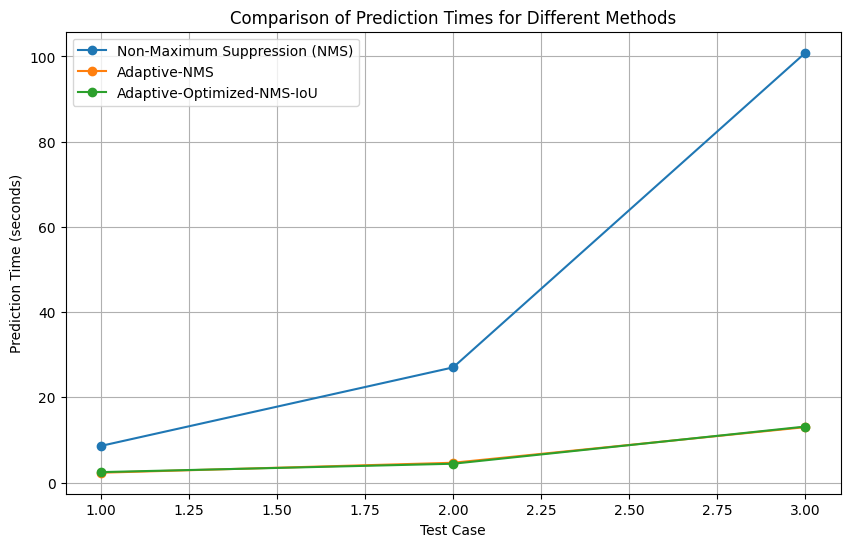

In [1]:
import matplotlib.pyplot as plt

# Data from the table
# X-axis indexes for each metric row (e.g., different test cases)
x = [1, 2, 3]

# Prediction times for each method
nms = [8.59, 27.02, 100.87]
adaptive_nms = [2.30, 4.64, 13.0]
adaptive_optimized_nms_iou = [2.44, 4.41, 13.14]

# Create a new figure and axis object
plt.figure(figsize=(10, 6))

# Plotting each method on the same axes with line markers
plt.plot(x, nms, marker='o', linestyle='-', label='Non-Maximum Suppression (NMS)')
plt.plot(x, adaptive_nms, marker='o', linestyle='-', label='Adaptive-NMS')
plt.plot(x, adaptive_optimized_nms_iou, marker='o', linestyle='-', label='Adaptive-Optimized-NMS-IoU')

# Adding title and axis labels
plt.title('Comparison of Prediction Times for Different Methods')
plt.xlabel('Test Case')
plt.ylabel('Prediction Time (seconds)')

# Add a legend to the plot
plt.legend()

# Optionally add a grid for better readability
plt.grid(True)

# Save the plot to a file
plt.savefig('prediction_time_comparison.png')

# Display the plot
plt.show()


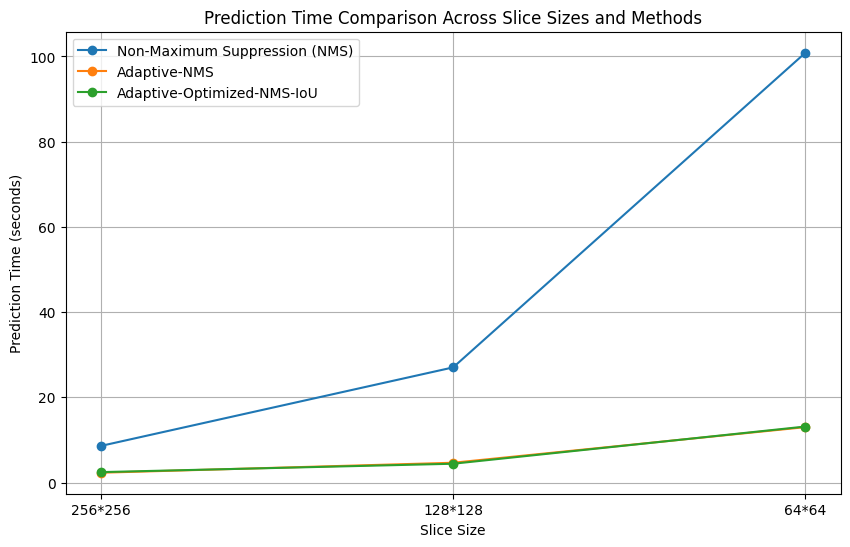

In [3]:
import matplotlib.pyplot as plt

# Define the slice sizes (as categorical labels)
slice_sizes = ['256*256', '128*128', '64*64']
x_positions = range(len(slice_sizes))  # positions: 0, 1, 2

# Prediction time values for each method based on the table rows
nms = [8.59, 27.02, 100.87]
adaptive_nms = [2.30, 4.64, 13.0]
adaptive_optimized_nms_iou = [2.44, 4.41, 13.14]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each method with markers and lines
plt.plot(x_positions, nms, marker='o', linestyle='-', label='Non-Maximum Suppression (NMS)')
plt.plot(x_positions, adaptive_nms, marker='o', linestyle='-', label='Adaptive-NMS')
plt.plot(x_positions, adaptive_optimized_nms_iou, marker='o', linestyle='-', label='Adaptive-Optimized-NMS-IoU')

# Set the x-axis tick positions and labels to reflect the slice sizes
plt.xticks(x_positions, slice_sizes)

# Adding title and labels
plt.title('Prediction Time Comparison Across Slice Sizes and Methods')
plt.xlabel('Slice Size')
plt.ylabel('Prediction Time (seconds)')

# Add a legend and grid for better clarity
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('prediction_time_comparison_slice_sizes.png')

# Display the plot
plt.show()


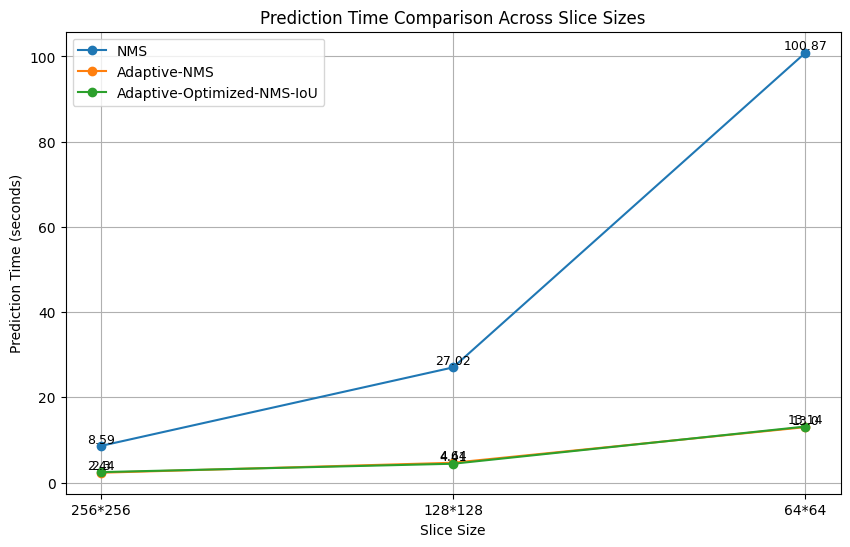

In [4]:
import matplotlib.pyplot as plt

# Define slice sizes as categorical labels
slice_sizes = ['256*256', '128*128', '64*64']
x_positions = range(len(slice_sizes))  # positions: 0, 1, 2

# Prediction times for each method corresponding to each slice size
nms = [8.59, 27.02, 100.87]
adaptive_nms = [2.30, 4.64, 13.0]
adaptive_optimized_nms_iou = [2.44, 4.41, 13.14]

# Create the figure and axis object
plt.figure(figsize=(10, 6))

# Plot each method with markers and lines
plt.plot(x_positions, nms, marker='o', linestyle='-', label='NMS')
plt.plot(x_positions, adaptive_nms, marker='o', linestyle='-', label='Adaptive-NMS')
plt.plot(x_positions, adaptive_optimized_nms_iou, marker='o', linestyle='-', label='Adaptive-Optimized-NMS-IoU')

# Annotate each data point with its value
for i, value in enumerate(nms):
    plt.text(x_positions[i], value, f'{value}', ha='center', va='bottom', fontsize=9)
    
for i, value in enumerate(adaptive_nms):
    plt.text(x_positions[i], value, f'{value}', ha='center', va='bottom', fontsize=9)
    
for i, value in enumerate(adaptive_optimized_nms_iou):
    plt.text(x_positions[i], value, f'{value}', ha='center', va='bottom', fontsize=9)

# Set the x-axis tick positions and labels to reflect the slice sizes
plt.xticks(x_positions, slice_sizes)

# Add labels and title
plt.xlabel('Slice Size')
plt.ylabel('Prediction Time (seconds)')
plt.title('Prediction Time Comparison Across Slice Sizes')

# Include a legend and grid for clarity
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('prediction_time_comparison_slice_sizes.png', bbox_inches='tight')

# Show the plot
plt.show()


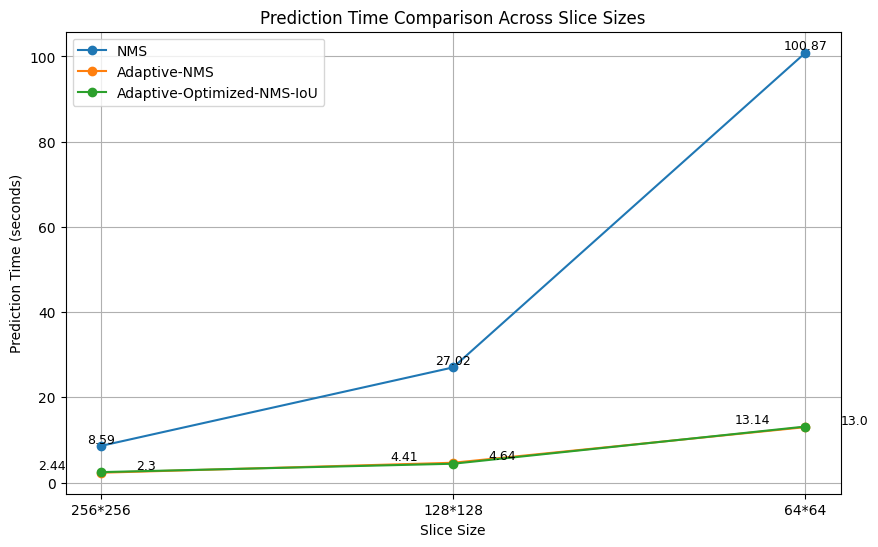

In [5]:
import matplotlib.pyplot as plt

# Define slice sizes as categorical labels
slice_sizes = ['256*256', '128*128', '64*64']
x_positions = range(len(slice_sizes))  # positions: 0, 1, 2

# Prediction time values for each method corresponding to each slice size
nms = [8.59, 27.02, 100.87]
adaptive_nms = [2.30, 4.64, 13.0]
adaptive_optimized_nms_iou = [2.44, 4.41, 13.14]

# Create the figure and axis object
plt.figure(figsize=(10, 6))

# Plot each method with markers and lines
plt.plot(x_positions, nms, marker='o', linestyle='-', label='NMS')
plt.plot(x_positions, adaptive_nms, marker='o', linestyle='-', label='Adaptive-NMS')
plt.plot(x_positions, adaptive_optimized_nms_iou, marker='o', linestyle='-', label='Adaptive-Optimized-NMS-IoU')

# Annotate each data point with its value.
# For Adaptive-NMS and Adaptive-Optimized-NMS-IoU, apply a small horizontal offset so labels are distinguishable.
for i, value in enumerate(nms):
    plt.text(x_positions[i], value, f'{value}', ha='center', va='bottom', fontsize=9)

for i, value in enumerate(adaptive_nms):
    plt.text(x_positions[i] + 0.1, value, f'{value}', ha='left', va='bottom', fontsize=9)

for i, value in enumerate(adaptive_optimized_nms_iou):
    plt.text(x_positions[i] - 0.1, value, f'{value}', ha='right', va='bottom', fontsize=9)

# Set the x-axis tick positions and labels to reflect the slice sizes
plt.xticks(x_positions, slice_sizes)

# Add labels and title
plt.xlabel('Slice Size')
plt.ylabel('Prediction Time (seconds)')
plt.title('Prediction Time Comparison Across Slice Sizes')

# Include a legend and grid for clarity
plt.legend()
plt.grid(True)

# Save the plot as an image file with tight layout to include all elements
plt.savefig('prediction_time_comparison_slice_sizes.png', bbox_inches='tight')

# Display the plot
plt.show()


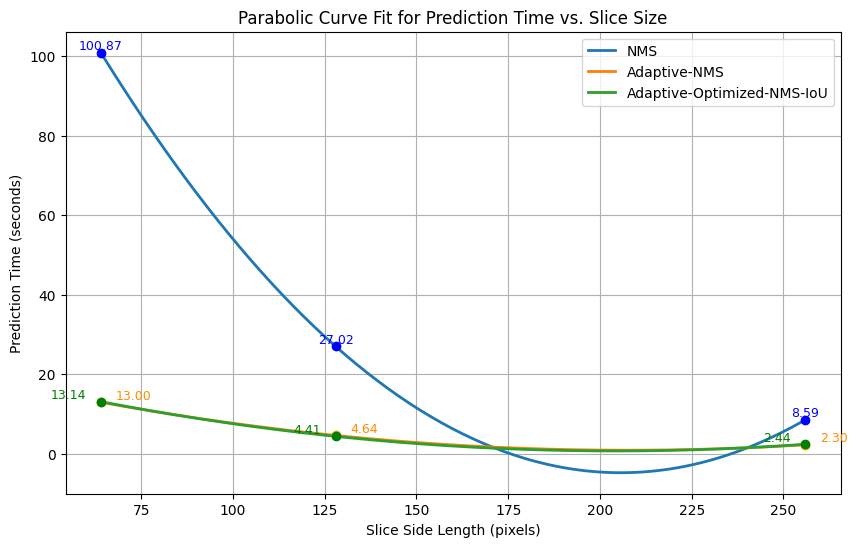

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Original slice sizes and corresponding prediction times.
# Note: The provided slice sizes are "256*256", "128*128", "64*64".
# We use the side length (e.g., 256, 128, 64) as our x-values.
# Since the curves are more naturally interpreted in increasing order of slice size,
# we reorder the data accordingly.
# For each method, the prediction time corresponding to:
#   slice size 256*256: NMS = 8.59, Adaptive-NMS = 2.30, Adaptive-Optimized-NMS-IoU = 2.44
#   slice size 128*128: NMS = 27.02, Adaptive-NMS = 4.64, Adaptive-Optimized-NMS-IoU = 4.41
#   slice size 64*64:   NMS = 100.87, Adaptive-NMS = 13.0, Adaptive-Optimized-NMS-IoU = 13.14
#
# For fitting, we rearrange so that x is in ascending order.
# x-values (side lengths): 64, 128, 256

x_sorted = np.array([64, 128, 256])
# Reorder the y-values accordingly:
# For NMS: for slice 64: 100.87, slice 128: 27.02, slice 256: 8.59
y_nms = np.array([100.87, 27.02, 8.59])
# For Adaptive-NMS: for slice 64: 13.0, slice 128: 4.64, slice 256: 2.30
y_adaptive = np.array([13.0, 4.64, 2.30])
# For Adaptive-Optimized-NMS-IoU: for slice 64: 13.14, slice 128: 4.41, slice 256: 2.44
y_optimized = np.array([13.14, 4.41, 2.44])

# Fit a quadratic (degree 2 polynomial) to each dataset.
coeff_nms = np.polyfit(x_sorted, y_nms, 2)
coeff_adaptive = np.polyfit(x_sorted, y_adaptive, 2)
coeff_optimized = np.polyfit(x_sorted, y_optimized, 2)

# Create a smooth range of x values for plotting the parabolic curves.
x_smooth = np.linspace(np.min(x_sorted), np.max(x_sorted), 200)

# Compute the smooth y-values using the fitted polynomial for each method.
y_nms_smooth = np.polyval(coeff_nms, x_smooth)
y_adaptive_smooth = np.polyval(coeff_adaptive, x_smooth)
y_optimized_smooth = np.polyval(coeff_optimized, x_smooth)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the parabolic curves for each method.
plt.plot(x_smooth, y_nms_smooth, label="NMS", linewidth=2)
plt.plot(x_smooth, y_adaptive_smooth, label="Adaptive-NMS", linewidth=2)
plt.plot(x_smooth, y_optimized_smooth, label="Adaptive-Optimized-NMS-IoU", linewidth=2)

# Plot the original data points with markers.
plt.scatter(x_sorted, y_nms, color='blue', zorder=5)
plt.scatter(x_sorted, y_adaptive, color='orange', zorder=5)
plt.scatter(x_sorted, y_optimized, color='green', zorder=5)

# Annotate each data point with its value. Offset annotations slightly for clarity.
for i, x_val in enumerate(x_sorted):
    plt.text(x_val, y_nms[i], f'{y_nms[i]:.2f}', fontsize=9,
             ha='center', va='bottom', color='blue')
    plt.text(x_val + 4, y_adaptive[i], f'{y_adaptive[i]:.2f}', fontsize=9,
             ha='left', va='bottom', color='darkorange')
    plt.text(x_val - 4, y_optimized[i], f'{y_optimized[i]:.2f}', fontsize=9,
             ha='right', va='bottom', color='green')

# Label the axes and the plot title.
plt.xlabel("Slice Side Length (pixels)")
plt.ylabel("Prediction Time (seconds)")
plt.title("Parabolic Curve Fit for Prediction Time vs. Slice Size")

# Add a legend and grid.
plt.legend()
plt.grid(True)

# Save the generated plot as an image file.
plt.savefig("parabolic_prediction_time_comparison.png", bbox_inches='tight')

# Display the plot.
plt.show()


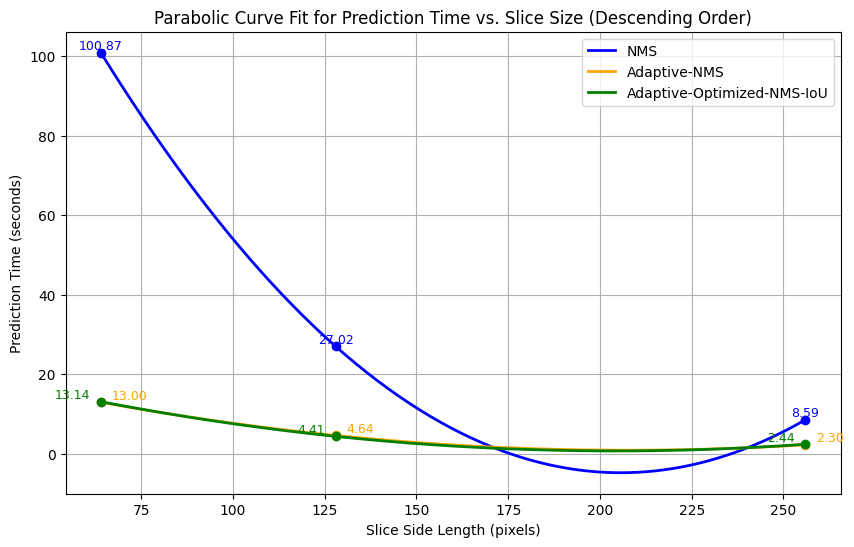

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Use descending order for slice sizes: 256, 128, 64
x_desc = np.array([256, 128, 64])
# The corresponding prediction times for each method (in seconds)
# For slice size 256*256: NMS: 8.59, Adaptive-NMS: 2.30, Adaptive-Optimized-NMS-IoU: 2.44
# For slice size 128*128: NMS: 27.02, Adaptive-NMS: 4.64, Adaptive-Optimized-NMS-IoU: 4.41
# For slice size 64*64:   NMS: 100.87, Adaptive-NMS: 13.0, Adaptive-Optimized-NMS-IoU: 13.14
y_nms = np.array([8.59, 27.02, 100.87])
y_adaptive = np.array([2.30, 4.64, 13.0])
y_optimized = np.array([2.44, 4.41, 13.14])

# Fit a quadratic (degree 2 polynomial) to each dataset.
coeff_nms = np.polyfit(x_desc, y_nms, 2)
coeff_adaptive = np.polyfit(x_desc, y_adaptive, 2)
coeff_optimized = np.polyfit(x_desc, y_optimized, 2)

# Create a smooth set of x-values in the descending order range: from 256 to 64.
x_smooth = np.linspace(x_desc[0], x_desc[-1], 200)

# Evaluate the polynomial fits to get the smooth curve y-values.
y_nms_smooth = np.polyval(coeff_nms, x_smooth)
y_adaptive_smooth = np.polyval(coeff_adaptive, x_smooth)
y_optimized_smooth = np.polyval(coeff_optimized, x_smooth)

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the parabolic curves for each method.
plt.plot(x_smooth, y_nms_smooth, label="NMS", linewidth=2, color='blue')
plt.plot(x_smooth, y_adaptive_smooth, label="Adaptive-NMS", linewidth=2, color='orange')
plt.plot(x_smooth, y_optimized_smooth, label="Adaptive-Optimized-NMS-IoU", linewidth=2, color='green')

# Plot the original data points
plt.scatter(x_desc, y_nms, color='blue', zorder=5)
plt.scatter(x_desc, y_adaptive, color='orange', zorder=5)
plt.scatter(x_desc, y_optimized, color='green', zorder=5)

# Annotate each data point with its value.
# Offsets for clarity: Adaptive-NMS label is shifted right, Adaptive-Optimized-NMS-IoU shifted left.
for i, x_val in enumerate(x_desc):
    plt.text(x_val, y_nms[i], f'{y_nms[i]:.2f}', fontsize=9,
             ha='center', va='bottom', color='blue')
    plt.text(x_val + 3, y_adaptive[i], f'{y_adaptive[i]:.2f}', fontsize=9,
             ha='left', va='bottom', color='orange')
    plt.text(x_val - 3, y_optimized[i], f'{y_optimized[i]:.2f}', fontsize=9,
             ha='right', va='bottom', color='green')

# Set axis labels and title.
plt.xlabel("Slice Side Length (pixels)")
plt.ylabel("Prediction Time (seconds)")
plt.title("Parabolic Curve Fit for Prediction Time vs. Slice Size (Descending Order)")

# Add legend and grid for clarity.
plt.legend()
plt.grid(True)

# Save the plot as an image file.
plt.savefig("parabolic_prediction_time_comparison_descending.png", bbox_inches='tight')

# Display the plot.
plt.show()


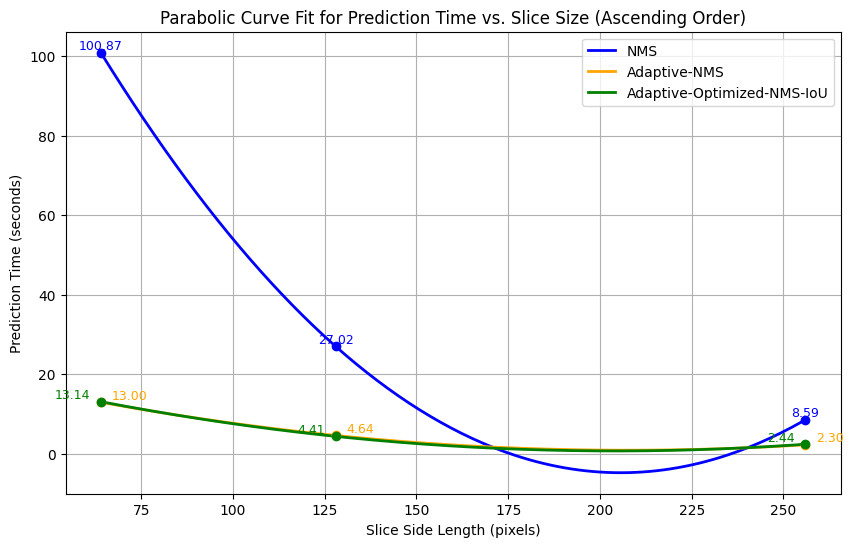

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define slice side lengths in ascending order: 64, 128, 256
x_asc = np.array([64, 128, 256])

# Reorder the prediction times corresponding to the ascending slice sizes:
# For slice size 64*64, NMS: 100.87, Adaptive-NMS: 13.0, Adaptive-Optimized-NMS-IoU: 13.14
# For slice size 128*128, NMS: 27.02, Adaptive-NMS: 4.64, Adaptive-Optimized-NMS-IoU: 4.41
# For slice size 256*256, NMS: 8.59, Adaptive-NMS: 2.30, Adaptive-Optimized-NMS-IoU: 2.44
y_nms = np.array([100.87, 27.02, 8.59])
y_adaptive = np.array([13.0, 4.64, 2.30])
y_optimized = np.array([13.14, 4.41, 2.44])

# Fit a quadratic (parabolic) curve to each method's data points.
coeff_nms = np.polyfit(x_asc, y_nms, 2)
coeff_adaptive = np.polyfit(x_asc, y_adaptive, 2)
coeff_optimized = np.polyfit(x_asc, y_optimized, 2)

# Create a smooth set of x-values for plotting the parabolic curve.
x_smooth = np.linspace(x_asc.min(), x_asc.max(), 200)
y_nms_smooth = np.polyval(coeff_nms, x_smooth)
y_adaptive_smooth = np.polyval(coeff_adaptive, x_smooth)
y_optimized_smooth = np.polyval(coeff_optimized, x_smooth)

# Create the plot.
plt.figure(figsize=(10, 6))

# Plot the smooth parabolic curves for each method.
plt.plot(x_smooth, y_nms_smooth, label='NMS', linewidth=2, color='blue')
plt.plot(x_smooth, y_adaptive_smooth, label='Adaptive-NMS', linewidth=2, color='orange')
plt.plot(x_smooth, y_optimized_smooth, label='Adaptive-Optimized-NMS-IoU', linewidth=2, color='green')

# Plot the original data points.
plt.scatter(x_asc, y_nms, color='blue', zorder=5)
plt.scatter(x_asc, y_adaptive, color='orange', zorder=5)
plt.scatter(x_asc, y_optimized, color='green', zorder=5)

# Annotate each data point with its value.
# For clarity, the Adaptive-NMS labels are shifted slightly right and Adaptive-Optimized-NMS-IoU labels slightly left.
for i, x_val in enumerate(x_asc):
    plt.text(x_val, y_nms[i], f'{y_nms[i]:.2f}', fontsize=9,
             ha='center', va='bottom', color='blue')
    plt.text(x_val + 3, y_adaptive[i], f'{y_adaptive[i]:.2f}', fontsize=9,
             ha='left', va='bottom', color='orange')
    plt.text(x_val - 3, y_optimized[i], f'{y_optimized[i]:.2f}', fontsize=9,
             ha='right', va='bottom', color='green')

# Set the axis labels and title.
plt.xlabel("Slice Side Length (pixels)")
plt.ylabel("Prediction Time (seconds)")
plt.title("Parabolic Curve Fit for Prediction Time vs. Slice Size (Ascending Order)")

# Add a legend and grid for clarity.
plt.legend()
plt.grid(True)

# Save the plot as an image file.
plt.savefig("parabolic_prediction_time_comparison_ascending.png", bbox_inches='tight')

# Display the plot.
plt.show()


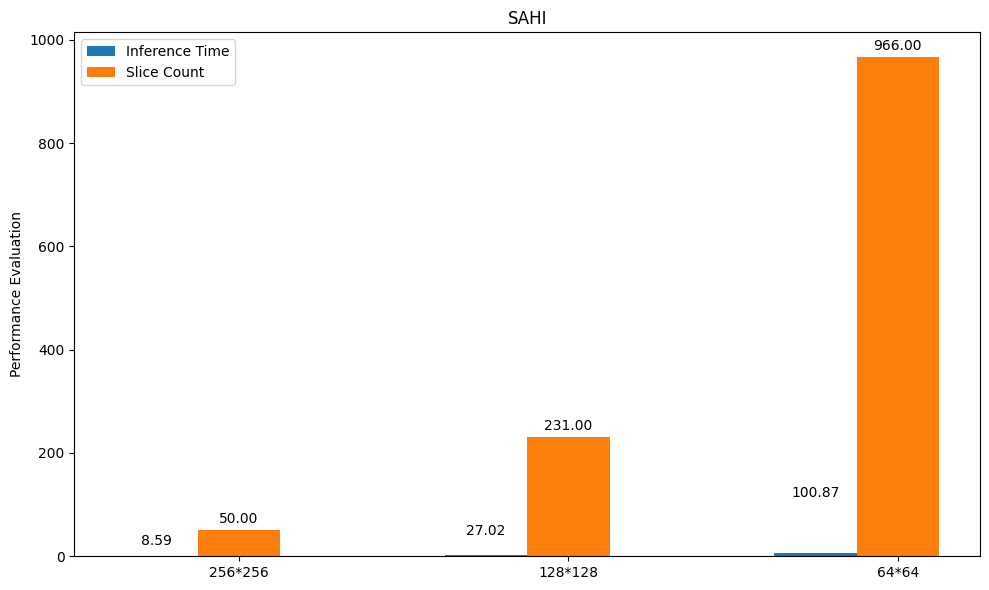

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table:
# Slice sizes and the corresponding prediction times (in seconds)
slice_sizes = ['256*256', '128*128', '64*64']

# Prediction times for each method corresponding to each slice size.
nms_times = [0.51, 1.59, 5.8]
nms_slice_count = [50, 231, 966]
#adaptive_optimized_times = [2.44, 4.41, 13.14]

# Positions for each group along the x-axis.
x = np.arange(len(slice_sizes))

# Set the width for each individual bar.
bar_width = 0.25

# Create the figure and axis.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each method, shifting positions for each group.
bars_time = ax.bar(x - bar_width, nms_times, bar_width, label='Inference Time')
bars_slice = ax.bar(x, nms_slice_count, bar_width, label='Slice Count')
#bars_optimized = ax.bar(x + bar_width, adaptive_optimized_times, bar_width, label='Adaptive-Optimized-NMS-IoU')

# Add axis labels and title.
ax.set_ylabel('Performance Evaluation')
ax.set_title('SAHI')
ax.set_xticks(x)
ax.set_xticklabels(slice_sizes)
ax.legend()

# Function to annotate bars with their respective values.
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset.
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate each set of bars.
annotate_bars(bars_nms)
annotate_bars(bars_slice)
#annotate_bars(bars_optimized)

# Improve layout and save the figure.
fig.tight_layout()
plt.savefig('bar_graph_prediction_time_1.png', bbox_inches='tight')
plt.show()


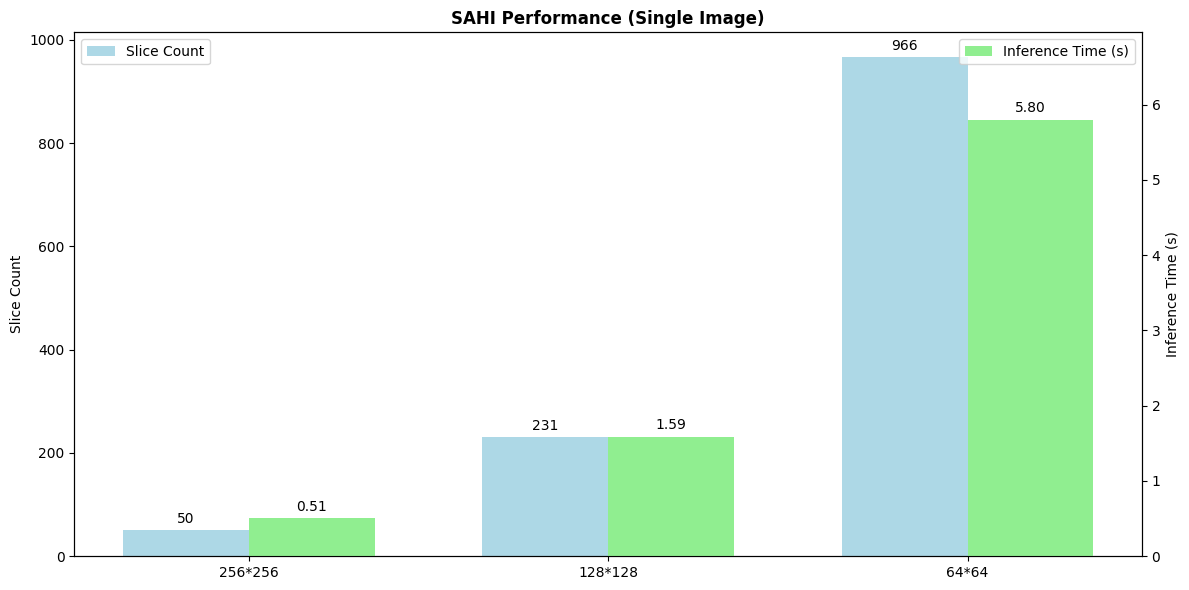

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data
slice_sizes       = ['256*256', '128*128', '64*64']
nms_slice_count   = [50, 231, 966]
nms_times         = [0.51, 1.59, 5.8]

# X positions and bar width
x = np.arange(len(slice_sizes))
bar_width = 0.35

fig, ax1 = plt.subplots(figsize=(12,6))

# First bar: Slice Count on left axis
bars_slice = ax1.bar(
    x - bar_width/2,
    nms_slice_count,
    bar_width,
    label='Slice Count',
    color='lightblue'
)
ax1.set_ylabel('Slice Count')
ax1.set_xticks(x)
ax1.set_xticklabels(slice_sizes)
ax1.legend(loc='upper left')
# Add title
ax1.set_title("SAHI Performance (Single Image)", weight="bold")

# Second bar: Inference Time on right axis
ax2 = ax1.twinx()
bars_time = ax2.bar(
    x + bar_width/2,
    nms_times,
    bar_width,
    label='Inference Time (s)',
    color='lightgreen'
)
ax2.set_ylabel('Inference Time (s)')
# zoom in so times (0.5–5.8 s) are visible
ax2.set_ylim(0, max(nms_times) * 1.2)
ax2.legend(loc='upper right')

# Annotate bars
def annotate_bars(ax, bars, fmt):
    for bar in bars:
        h = bar.get_height()
        ax.annotate(
            fmt.format(h),
            xy=(bar.get_x() + bar.get_width()/2, h),
            xytext=(0,3),
            textcoords='offset points',
            ha='center', va='bottom'
        )

annotate_bars(ax1, bars_slice, "{:.0f}")
annotate_bars(ax2, bars_time, "{:.2f}")

fig.tight_layout()
plt.savefig('bar_graph_prediction_time_1.png', bbox_inches='tight')
plt.show()


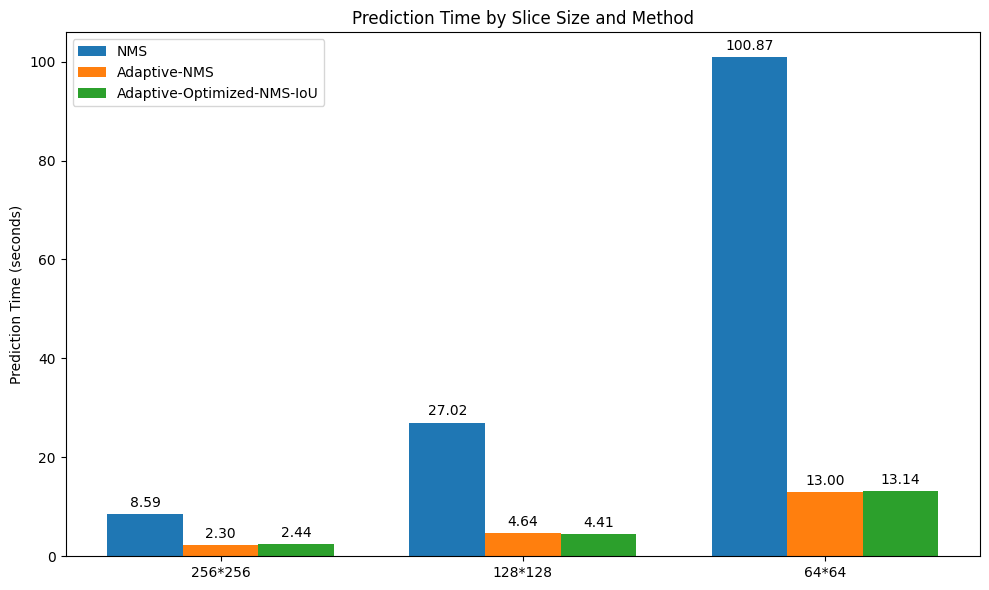

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table:
# Slice sizes and the corresponding prediction times (in seconds)
slice_sizes = ['256*256', '128*128', '64*64']

# Prediction times for each method corresponding to each slice size.
nms_times = [8.59, 27.02, 100.87]
adaptive_nms_times = [2.30, 4.64, 13.0]
adaptive_optimized_times = [2.44, 4.41, 13.14]

# Positions for each group along the x-axis.
x = np.arange(len(slice_sizes))

# Set the width for each individual bar.
bar_width = 0.25

# Create the figure and axis.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each method, shifting positions for each group.
bars_nms = ax.bar(x - bar_width, nms_times, bar_width, label='NMS')
bars_adaptive = ax.bar(x, adaptive_nms_times, bar_width, label='Adaptive-NMS')
bars_optimized = ax.bar(x + bar_width, adaptive_optimized_times, bar_width, label='Adaptive-Optimized-NMS-IoU')

# Add axis labels and title.
ax.set_ylabel('Prediction Time (seconds)')
ax.set_title('Prediction Time by Slice Size and Method')
ax.set_xticks(x)
ax.set_xticklabels(slice_sizes)
ax.legend()

# Function to annotate bars with their respective values.
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset.
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate each set of bars.
annotate_bars(bars_nms)
annotate_bars(bars_adaptive)
annotate_bars(bars_optimized)

# Improve layout and save the figure.
fig.tight_layout()
plt.savefig('bar_graph_prediction_time.png', bbox_inches='tight')
plt.show()


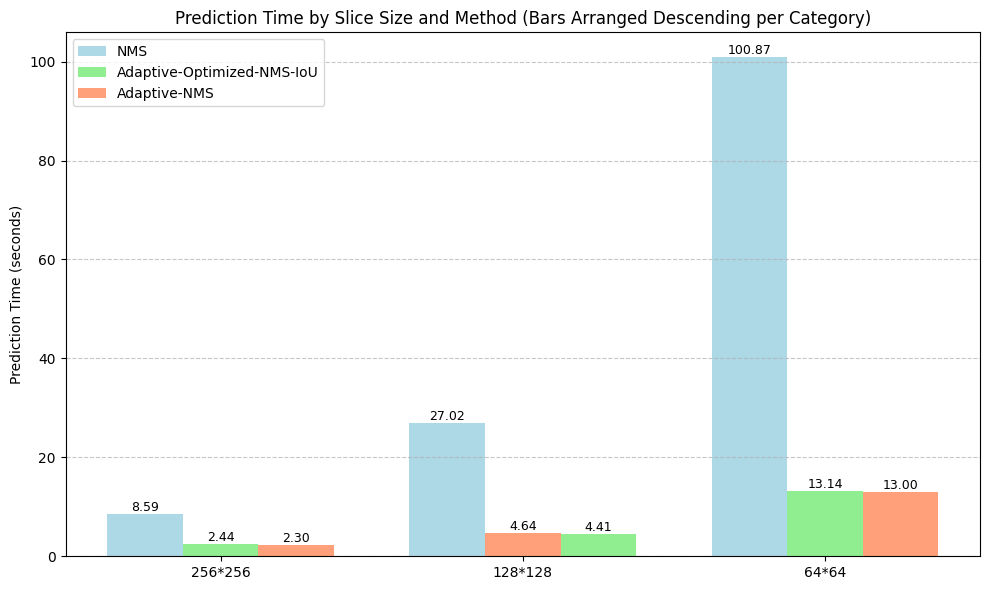

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each slice size category.
# The keys represent the slice size and the values are dictionaries mapping method names to prediction times.
data = {
    "256*256": {"Baseline SAHI": 0.187, "Adaptive-Grid-Based SAHI": 0.188, "Adaptive-Multilevel SAHI": 0.187},
    "128*18": {"Baseline SAHI": 0.096, "Adaptive-Grid-Based SAHI": 0.160, "Adaptive-Multilevel SAHI": 0.161},
    "64*64":  {"Baseline SAHI": 0.058, "Adaptive-Grid-Based SAHI": 0.166, "Adaptive-Multilevel SAHI": 0.167}
}

# Colors assigned to each method (to be consistent across groups)
colors = {
    "Baseline SAHI": 'lightblue',
    "Adaptive-Grid-Based SAHI": 'lightsalmon',
    "Adaptive-Multilevel SAHI": 'lightgreen'
}

# Categories (slice sizes) in the order we want to display them.
categories = ["256*256", "128*128", "64*64"]
x = np.arange(len(categories))  # x positions for each group

# Width for each bar in the group.
bar_width = 0.25

# Set up the plot.
fig, ax = plt.subplots(figsize=(10, 6))

# Dictionary to track if a method's legend entry has been added already.
legend_added = {}

# For each category group, sort the methods by prediction time (descending) and plot the bars.
for i, category in enumerate(categories):
    # Get the data for this category as a list of (method, value) tuples.
    group_data = data[category]
    # Sort the methods in descending order by prediction time.
    sorted_group = sorted(group_data.items(), key=lambda item: item[1], reverse=True)
    
    # For each method in sorted order, calculate the bar position relative to the group center.
    for j, (method, value) in enumerate(sorted_group):
        # For three bars, use positions: group_x + (-1)*bar_width, group_x + 0, group_x + (1)*bar_width.
        bar_pos = x[i] + (j - 1) * bar_width
        
        # Only add the legend label once per method.
        label = method if method not in legend_added else None
        legend_added[method] = True
        
        # Plot the bar.
        bar = ax.bar(bar_pos, value, bar_width, color=colors[method], label=label)
        
        # Annotate the bar with its prediction time.
        ax.text(bar_pos, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the x-axis ticks and labels.
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Label the axes and the chart.
ax.set_ylabel('Prediction Time (seconds)')
ax.set_title('Prediction Time by Slice Size and Method (Bars Arranged Descending per Category)')

# Add grid and legend.
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Improve layout and save the image.
plt.tight_layout()
plt.savefig('bar_graph_descending_order.png', bbox_inches='tight')
plt.show()


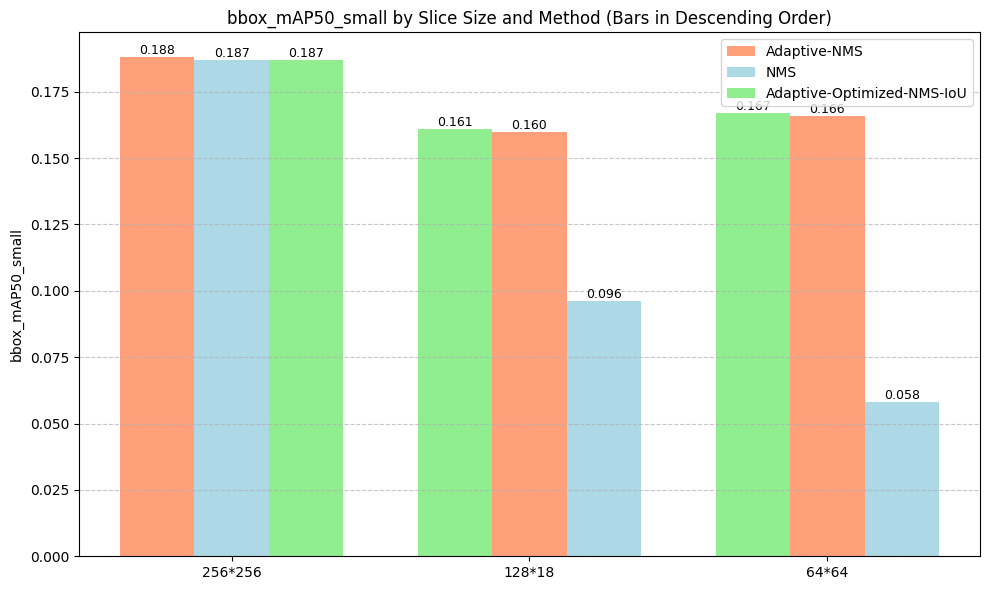

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bbox_mAP50_small metric.
# Keys represent slice sizes and values are dictionaries mapping each method to its metric value.
data = {
    "256*256": {"Baseline SAHI": 0.187, "Adaptive-Grid-Based SAHI": 0.188, "Adaptive-Multilevel SAHI": 0.187},
    "128*18": {"Baseline SAHI": 0.096, "Adaptive-Grid-Based SAHI": 0.160, "Adaptive-Multilevel SAHI": 0.161},
    "64*64":  {"Baseline SAHI": 0.058, "Adaptive-Grid-Based SAHI": 0.166, "Adaptive-Multilevel SAHI": 0.167}
}

# Define consistent colors for each method.
colors = {
    "Baseline SAHI": 'lightblue',
    "Adaptive-Grid-Based SAHI": 'lightsalmon',
    "Adaptive-Multilevel SAHI": 'lightgreen'
}


# Categories to display (slice sizes)
categories = ["256*256", "128*18", "64*64"]
x = np.arange(len(categories))  # positions for each category

# Set bar width (for three bars per category).
bar_width = 0.25

# Create the figure and axis.
fig, ax = plt.subplots(figsize=(10, 6))

# Dictionary to track if a method's legend label has been added (to avoid duplicates).
legend_added = {}

# For each category, sort the methods in descending order (highest to lowest value) and plot their bars.
for i, category in enumerate(categories):
    group_data = data[category]
    # Sort methods by value in descending order.
    sorted_group = sorted(group_data.items(), key=lambda item: item[1], reverse=True)
    
    # For three bars in each group, we'll use positions: x[i] + (j - 1) * bar_width,
    # so that j=0,1,2 maps to left, center, right positions respectively.
    for j, (method, value) in enumerate(sorted_group):
        bar_pos = x[i] + (j - 1) * bar_width
        # Ensure each method is added to the legend only once.
        label = method if method not in legend_added else None
        legend_added[method] = True
        
        # Plot the bar.
        bar = ax.bar(bar_pos, value, bar_width, color=colors[method], label=label)
        # Annotate each bar with its value, formatted to three decimals.
        ax.text(bar_pos, value, f'{value:.3f}', ha='center', va='bottom', fontsize=9)

# Set x-axis positions and labels.
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Add axis labels and title.
ax.set_ylabel("bbox_mAP50_small")
ax.set_title("bbox_mAP50_small by Slice Size and Method (Bars in Descending Order)")

# Add a legend and grid for clarity.
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve the layout and save the generated graph as an image.
plt.tight_layout()
plt.savefig("bar_graph_bbox_mAP50_small_descending.png", bbox_inches='tight')
plt.show()


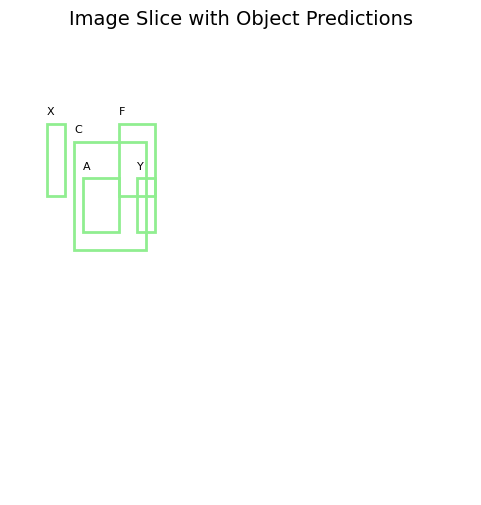

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a synthetic image slice (256x256, white background)
image = np.ones((256, 256, 3), dtype=np.float32)

# Example object predictions: each dictionary contains a bounding box, label, and score.
# The 'bbox' format here is [x, y, width, height].
predictions = [
    {"bbox": [40, 50, 10, 40], "label": "X", "score": 0.92},
    {"bbox": [30, 80, 20, 50], "label": "Y", "score": 0.87},
    {"bbox": [50, 80, 40, 30], "label": "A", "score": 0.87},
    {"bbox": [70, 80, 20, 60], "label": "B", "score": 0.87},
    {"bbox": [75, 60, 40, 60], "label": "C", "score": 0.87},
    {"bbox": [40, 60, 20, 60], "label": "D", "score": 0.87},
    {"bbox": [95, 50, 10, 50], "label": "E", "score": 0.87},
    {"bbox": [60, 50, 20, 40], "label": "F", "score": 0.87}
]

predictions1 = [
    {"bbox": [20, 50, 10, 40], "label": "X", "score": 0.92},
    {"bbox": [70, 80, 10, 30], "label": "Y", "score": 0.87},
    {"bbox": [40, 80, 20, 30], "label": "A", "score": 0.87},
    {"bbox": [35, 60, 40, 60], "label": "C", "score": 0.87},
    {"bbox": [60, 50, 20, 40], "label": "F", "score": 0.87}
]

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)

# Plot each prediction as a rectangle with label text
for pred in predictions1:
    x, y, w, h = pred["bbox"]
    # Create a rectangle patch with a red edge
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='lightgreen', facecolor='none')
    ax.add_patch(rect)
    # Annotate with label and score just above the rectangle
    ax.text(x, y - 5, f"{pred['label']}", color='black', fontsize=8)

# Remove axes for clarity
plt.axis('off')
plt.title("Image Slice with Object Predictions", fontsize=14)
plt.show()


In [2]:
import os
import shutil

def copy_annotations_for_images(
    input_images_dir: str,
    annotations_dir: str,
    output_dir: str,
    image_exts: set = None,
    annotation_exts: set = None
) -> None:
    """
    Copies annotation files corresponding to each image in `input_images_dir`
    from `annotations_dir` into `output_dir`.

    Args:
        input_images_dir (str): Path to the folder containing image files.
        annotations_dir (str): Path to the folder containing annotation files.
        output_dir (str): Destination folder to copy matching annotation files into.
        image_exts (set of str, optional): Image file extensions to consider
            (default: {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}).
        annotation_exts (set of str, optional): Annotation file extensions to consider
            (default: {'.xml', '.txt', '.json'}).

    Raises:
        FileNotFoundError: If any of the provided directories do not exist.
    """
    # Defaults
    if image_exts is None:
        image_exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
    if annotation_exts is None:
        annotation_exts = {'.xml', '.txt', '.json'}

    # Validate directories
    for path in (input_images_dir, annotations_dir):
        if not os.path.isdir(path):
            raise FileNotFoundError(f"Directory not found: {path}")

    os.makedirs(output_dir, exist_ok=True)

    for fname in os.listdir(input_images_dir):
        base, img_ext = os.path.splitext(fname)
        if img_ext.lower() not in image_exts:
            continue

        found = False
        for ann_ext in annotation_exts:
            ann_name = base + ann_ext
            src = os.path.join(annotations_dir, ann_name)
            if os.path.isfile(src):
                dst = os.path.join(output_dir, ann_name)
                shutil.copy2(src, dst)
                print(f"Copied: {ann_name}")
                found = True
                break

        if not found:
            print(f"[WARN] No annotation for image: {fname}")


In [4]:

copy_annotations_for_images(
    input_images_dir="./testdev_subsets/medium/v1/images",
    annotations_dir="../../yolov9/datasets/VisDrone/VisDrone2019-DET-test-dev/annotations",
    output_dir="./testdev_subsets/medium/v1/annotations",
    image_exts={".jpg", ".png"},
    annotation_exts={".txt"}
)


Copied: 9999941_00000_d_0000004.txt
Copied: 9999938_00000_d_0000009.txt
Copied: 9999986_00000_d_0000012.txt
Copied: 0000063_06000_d_0000007.txt
Copied: 9999938_00000_d_0000299.txt
Copied: 9999938_00000_d_0000031.txt
Copied: 0000164_01068_d_0000162.txt
Copied: 9999952_00000_d_0000191.txt
Copied: 0000272_04000_d_0000009.txt
Copied: 9999947_00000_d_0000002.txt
Copied: 9999938_00000_d_0000396.txt
Copied: 9999973_00000_d_0000141.txt
Copied: 9999973_00000_d_0000005.txt
Copied: 9999938_00000_d_0000345.txt
Copied: 9999973_00000_d_0000128.txt
Copied: 9999938_00000_d_0000007.txt
Copied: 9999979_00000_d_0000051.txt
Copied: 9999938_00000_d_0000056.txt
Copied: 9999973_00000_d_0000049.txt
Copied: 9999938_00000_d_0000392.txt
Copied: 9999938_00000_d_0000328.txt
Copied: 9999952_00000_d_0000066.txt
Copied: 9999938_00000_d_0000273.txt
Copied: 9999952_00000_d_0000202.txt
Copied: 9999996_00000_d_0000013.txt
Copied: 9999938_00000_d_0000035.txt
Copied: 9999952_00000_d_0000083.txt
Copied: 9999963_00000_d_0000

In [3]:
ls ../../yolov9/datasets/VisDrone/VisDrone2019-DET-test-dev/annotations

0000006_00159_d_0000001.txt  9999944_00000_d_0000003.txt
0000006_00611_d_0000002.txt  9999944_00000_d_0000004.txt
0000006_01111_d_0000003.txt  9999947_00000_d_0000001.txt
0000006_01275_d_0000004.txt  9999947_00000_d_0000002.txt
0000006_01659_d_0000004.txt  9999947_00000_d_0000003.txt
0000006_02138_d_0000006.txt  9999947_00000_d_0000004.txt
0000006_02616_d_0000007.txt  9999947_00000_d_0000005.txt
0000006_03636_d_0000009.txt  9999947_00000_d_0000006.txt
0000006_04050_d_0000010.txt  9999947_00000_d_0000007.txt
0000006_04309_d_0000011.txt  9999947_00000_d_0000008.txt
0000006_05168_d_0000013.txt  9999947_00000_d_0000009.txt
0000006_05208_d_0000014.txt  9999947_00000_d_0000010.txt
0000006_05575_d_0000016.txt  9999947_00000_d_0000011.txt
0000006_05999_d_0000017.txt  9999947_00000_d_0000012.txt
0000006_06773_d_0000018.txt  9999947_00000_d_0000013.txt
0000006_07596_d_0000020.txt  9999947_00000_d_0000014.txt
0000011_00234_d_0000001.txt  9999947_00000_d_0000015.txt
0000011_01350_d_0000003.txt  99

In [5]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU (test-dev dataset)
benchmark(model="../models/yolov8/last.pt", data="../VisDrone.yaml", imgsz=640, half=False, device=0)

Setup complete ✅ (48 CPUs, 503.3 GB RAM, 29.0/430.3 GB disk)

Benchmarks complete for ../models/yolov8/last.pt on ../VisDrone.yaml at imgsz=640 (63.79s)
Benchmarks legend:  - ✅ Success  - ❎ Export passed but validation failed  - ❌️ Export failed
                   Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)     FPS
0                 PyTorch       ✅        5.9                 0.0                   7.15  139.89
1             TorchScript       ✅       11.9                 0.0                   2.36   423.3
2                    ONNX       ❎       11.7                   -                      -       -
3                OpenVINO       ❌        0.0                   -                      -       -
4                TensorRT       ❌        0.0                   -                      -       -
5                  CoreML       ❌        0.0                   -                      -       -
6   TensorFlow SavedModel       ❌        0.0                   -                  

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,✅,5.9,0.0,7.15,139.89
1,TorchScript,✅,11.9,0.0,2.36,423.30
2,ONNX,❎,11.7,NaN,NaN,NaN
3,OpenVINO,❌,0.0,NaN,NaN,NaN
4,TensorRT,❌,0.0,NaN,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN


In [6]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.96 🚀 Python-3.9.18 torch-2.1.2+cu118 CUDA:0 (NVIDIA A100 80GB PCIe, 81229MiB)
Setup complete ✅ (48 CPUs, 503.3 GB RAM, 29.0/430.3 GB disk)


In [9]:
# Validate YOLO11n on COCO8 val
!yolo val model='../models/yolov8/last.pt' data='../VisDrone.yaml'

Ultralytics 8.3.96 🚀 Python-3.9.18 torch-2.1.2+cu118 CUDA:0 (NVIDIA A100 80GB PCIe, 81229MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /mmfs1/scratch/dsu.local/bshakya/scratch/bshakya/sahi/custom_utils
val: WARNING ⚠️ /mmfs1/scratch/dsu.local/bshakya/scratch/bshakya/sahi/custom_utils/testdev_subsets/medium/v1/images/0000063_05000_d_0000006.jpg: ignoring corrupt image/label: could not convert string to float: '489,229,33,89,1,1,0,0'
val: WARNING ⚠️ /mmfs1/scratch/dsu.local/bshakya/scratch/bshakya/sahi/custom_utils/testdev_subsets/medium/v1/images/0000063_06000_d_0000007.jpg: ignoring corrupt image/label: could not convert string to float: '585,331,44,101,1,1,0,0'
val: WARNING ⚠️ /mmfs1/scratch/dsu.local/bshakya/scratch/bshakya/sahi/custom_utils/testdev_subsets/medium/v1/images/0000164_01068_d_0000162.jpg: ignoring corrupt image/label: could not convert string to float: '340,487,14,44,1,3,0,1'
val: WARNING ⚠️ /mmfs1/scratch/dsu.local/b

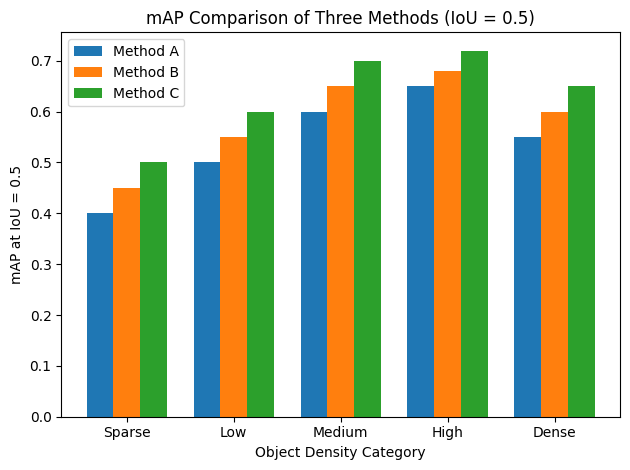

In [1]:
import matplotlib.pyplot as plt

# 1) Define your categories and mAP values for IoU=0.5
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
method_a = [0.40, 0.50, 0.60, 0.65, 0.55]
method_b = [0.45, 0.55, 0.65, 0.68, 0.60]
method_c = [0.50, 0.60, 0.70, 0.72, 0.65]

# 2) Set up the x locations and bar width
x = range(len(categories))
bar_width = 0.25

# 3) Plot each method’s bars, offset by bar_width
plt.figure()
plt.bar([i - bar_width for i in x], method_a, width=bar_width, label='Method A')
plt.bar(x,                     method_b, width=bar_width, label='Method B')
plt.bar([i + bar_width for i in x], method_c, width=bar_width, label='Method C')

# 4) Labeling
plt.xticks(x, categories)
plt.xlabel('Object Density Category')
plt.ylabel('mAP at IoU = 0.5')
plt.title('mAP Comparison of Three Methods (IoU = 0.5)')
plt.legend()
plt.tight_layout()
plt.show()

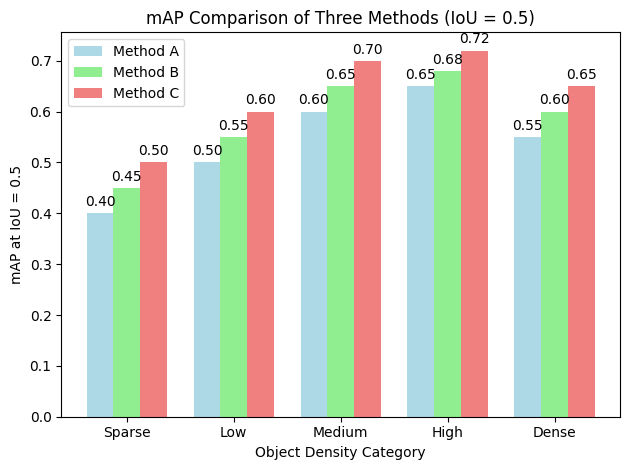

In [2]:
import matplotlib.pyplot as plt

# Example data for IoU=0.5
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
method_a = [0.40, 0.50, 0.60, 0.65, 0.55]
method_b = [0.45, 0.55, 0.65, 0.68, 0.60]
method_c = [0.50, 0.60, 0.70, 0.72, 0.65]

x = range(len(categories))
bar_width = 0.25

# Light colors for each method
colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.figure()
bars1 = plt.bar([i - bar_width for i in x], method_a, width=bar_width, label='Method A', color=colors[0])
bars2 = plt.bar(x,                     method_b, width=bar_width, label='Method B', color=colors[1])
bars3 = plt.bar([i + bar_width for i in x], method_c, width=bar_width, label='Method C', color=colors[2])

# Annotate values on top of each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom')

plt.xticks(x, categories)
plt.xlabel('Object Density Category')
plt.ylabel('mAP (IoU = 0.5)')
plt.title('mAP Comparison of Three Slicing Methods (IoU = 0.5)')
plt.legend()
plt.tight_layout()
plt.show()


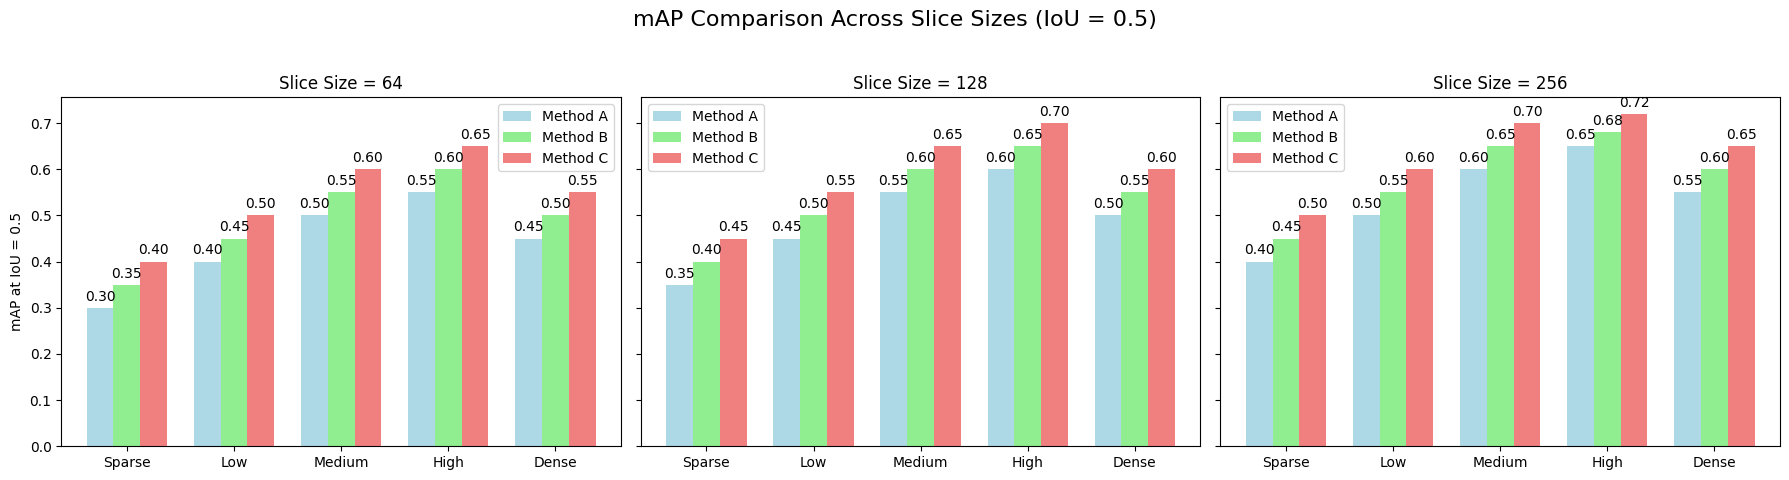

In [3]:
import matplotlib.pyplot as plt

# Example data for IoU=0.5 and three slice sizes
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]

# Dummy mAP values per method per slice size
# Replace these with your actual mAP arrays
map_values = {
    64:  {'A': [0.30, 0.40, 0.50, 0.55, 0.45],
          'B': [0.35, 0.45, 0.55, 0.60, 0.50],
          'C': [0.40, 0.50, 0.60, 0.65, 0.55]},
    128: {'A': [0.35, 0.45, 0.55, 0.60, 0.50],
          'B': [0.40, 0.50, 0.60, 0.65, 0.55],
          'C': [0.45, 0.55, 0.65, 0.70, 0.60]},
    256: {'A': [0.40, 0.50, 0.60, 0.65, 0.55],
          'B': [0.45, 0.55, 0.65, 0.68, 0.60],
          'C': [0.50, 0.60, 0.70, 0.72, 0.65]},
}

colors = ['lightblue', 'lightgreen', 'lightcoral']
bar_width = 0.25
x = range(len(categories))

# Create faceted bar charts (small multiples)
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 5))

for ax, size in zip(axes, slice_sizes):
    vals = map_values[size]
    bars1 = ax.bar([i - bar_width for i in x], vals['A'], width=bar_width, color=colors[0], label='Method A')
    bars2 = ax.bar(x, vals['B'], width=bar_width, color=colors[1], label='Method B')
    bars3 = ax.bar([i + bar_width for i in x], vals['C'], width=bar_width, color=colors[2], label='Method C')
    
    # Annotate each bar
    for bars in (bars1, bars2, bars3):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom')
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_title(f'Slice Size = {size}')
    if ax is axes[0]:
        ax.set_ylabel('mAP at IoU = 0.5')
    ax.legend()

fig.suptitle('mAP Comparison Across Slice Sizes (IoU = 0.5)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

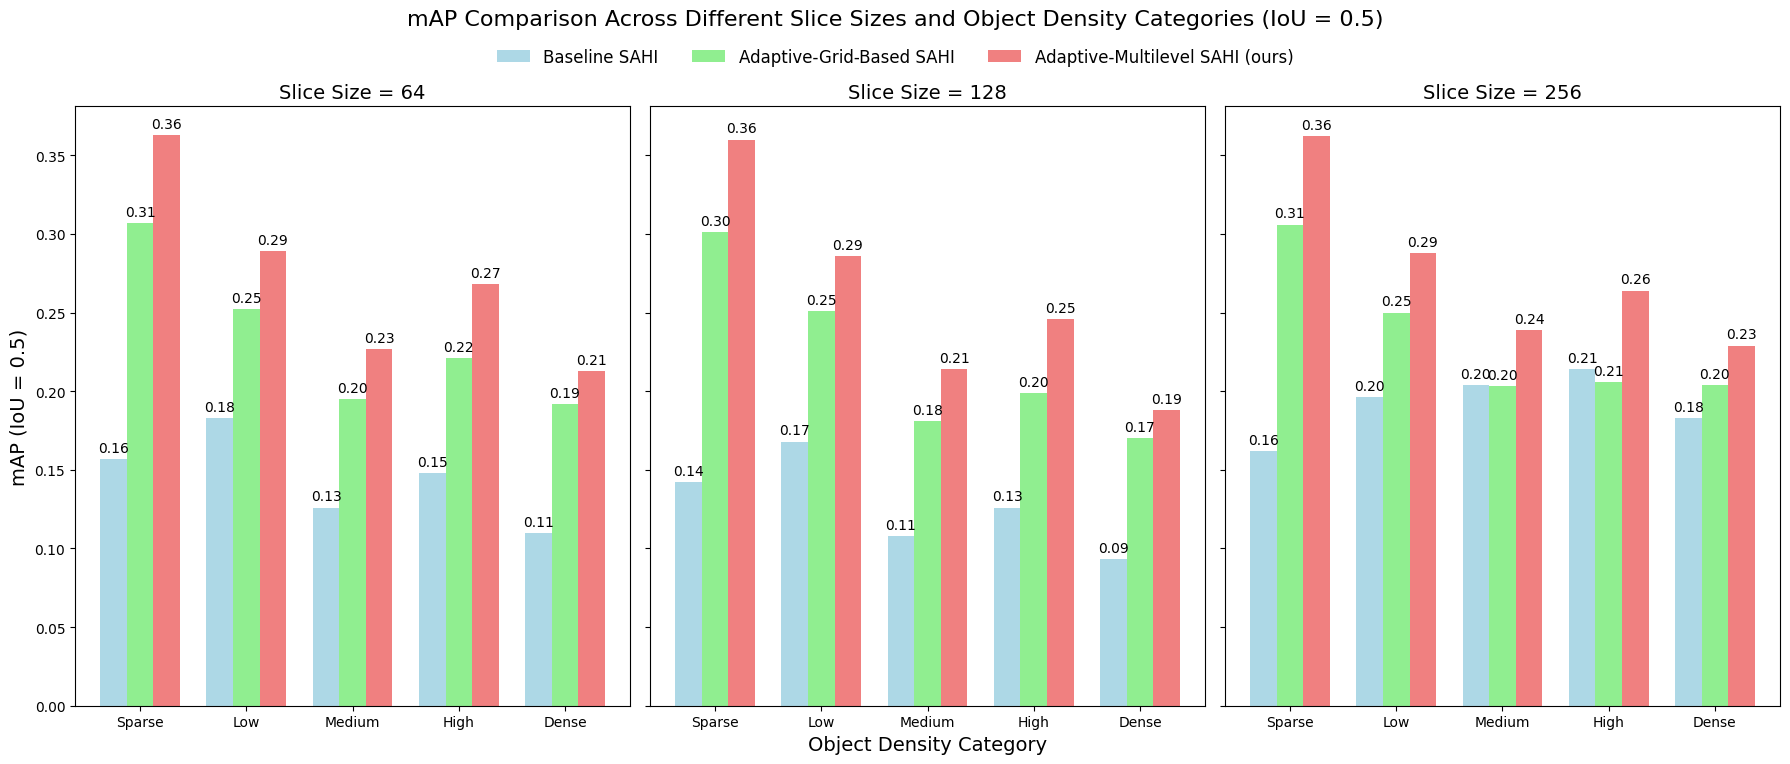

In [1]:
import matplotlib.pyplot as plt

# Apply presentation-friendly font settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 16
})


# Example data for IoU=0.5 and three slice sizes
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]

map_values = {
    64:  {'Baseline SAHI': [0.157, 0.183, 0.126, 0.148, 0.110],
          'Adaptive-Grid-Based SAHI': [0.307, 0.252, 0.195, 0.221, 0.192 ],
          'Adaptive-Multilevel SAHI': [0.363, 0.289, 0.227, 0.268, 0.213]},
    
    128: {'Baseline SAHI': [0.142, 0.168, 0.108, 0.126, 0.093 ],
          'Adaptive-Grid-Based SAHI': [0.301, 0.251, 0.181,  0.199, 0.170],
          'Adaptive-Multilevel SAHI': [0.360, 0.286, 0.214, 0.246, 0.188 ]},
    
    256: {'Baseline SAHI': [0.162, 0.196, 0.204, 0.214, 0.183],
          'Adaptive-Grid-Based SAHI': [0.306, 0.25, 0.203, 0.206, 0.204],
          'Adaptive-Multilevel SAHI': [0.362, 0.288, 0.239, 0.264, 0.229 ]},
}

colors = ['lightblue', 'lightgreen', 'lightcoral']
bar_width = 0.25
x = range(len(categories))

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 8))

for ax, size in zip(axes, slice_sizes):
    vals = map_values[size]
    bars1 = ax.bar([i - bar_width for i in x], vals['Baseline SAHI'], width=bar_width, color=colors[0], label='Baseline SAHI')
    bars2 = ax.bar(x,                     vals['Adaptive-Grid-Based SAHI'], width=bar_width, color=colors[1], label='Adaptive-Grid-Based SAHI')
    bars3 = ax.bar([i + bar_width for i in x], vals['Adaptive-Multilevel SAHI'], width=bar_width, color=colors[2], label='Adaptive-Multilevel SAHI (ours)')
    
    for bars in (bars1, bars2, bars3):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom')
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_title(f'Slice Size = {size}')
    
    if ax is axes[1]:
        ax.set_xlabel('Object Density Category')
    if ax is axes[0]:
        ax.set_ylabel('mAP (IoU = 0.5)')
       
    #ax.legend()

    
fig.suptitle('mAP Comparison Across Different Slice Sizes and Object Density Categories (IoU = 0.5)', fontsize=16)

# Create a common legend outside, aligned horizontally above the plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.95), frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
output_path = './map_comparison_iou50.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()


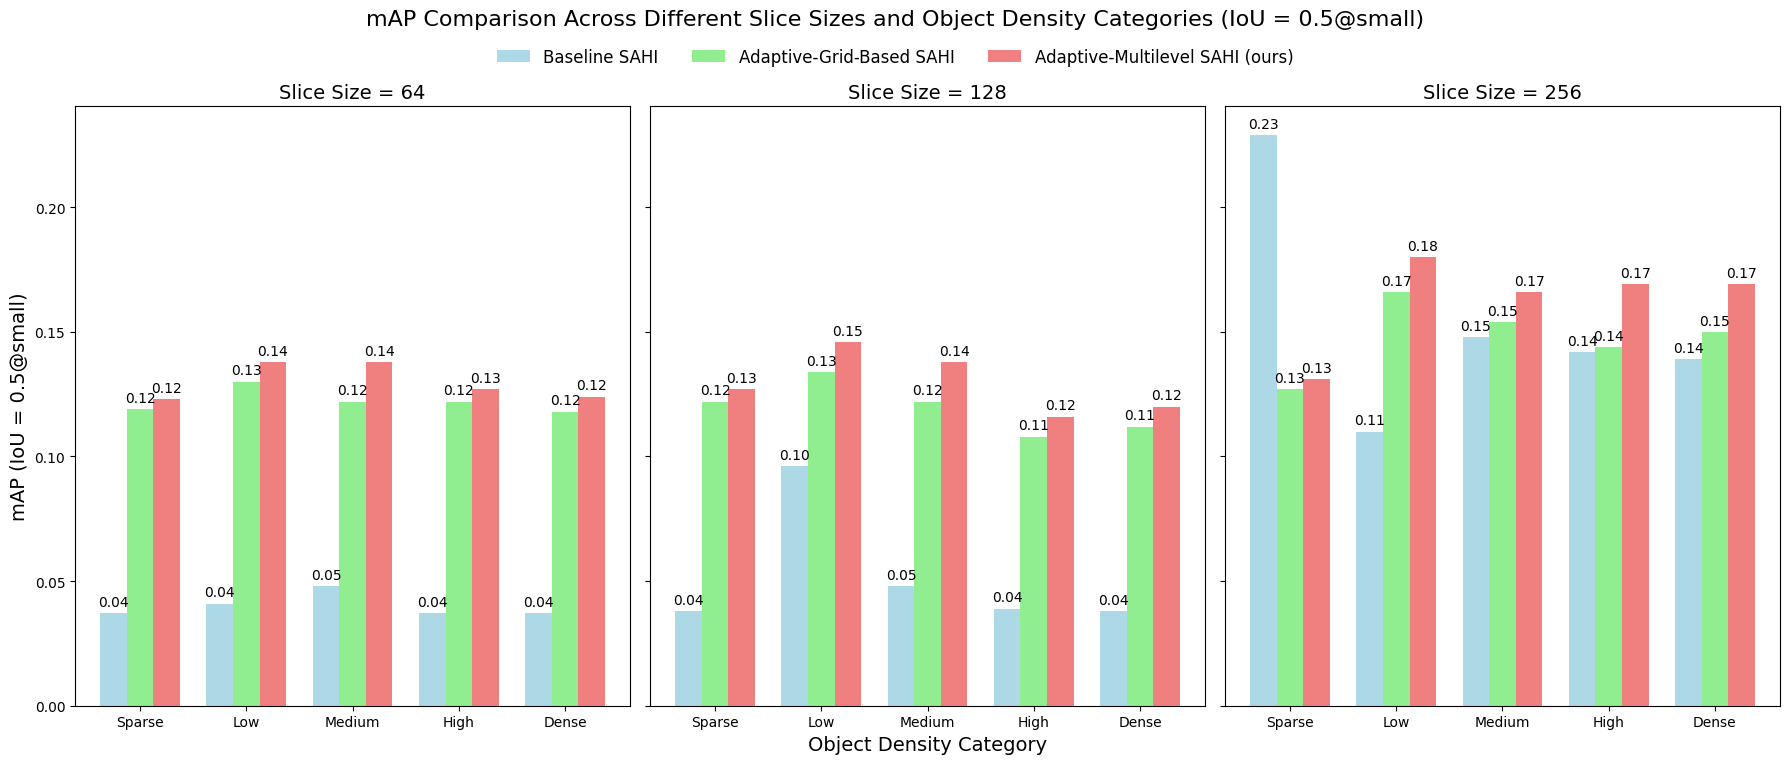

In [10]:
import matplotlib.pyplot as plt

# Apply presentation-friendly font settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 16
})


# Example data for IoU=0.5 and three slice sizes
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]

map_values = {
    64:  {'Baseline SAHI': [0.037, 0.041, 0.048, 0.037, 0.037],
          'Adaptive-Grid-Based SAHI': [0.119, 0.130, 0.122, 0.122, 0.118],
          'Adaptive-Multilevel SAHI': [0.123, 0.138, 0.138, 0.127, 0.124]},
    
    128: {'Baseline SAHI': [0.038, 0.096, 0.048, 0.039, 0.038],
          'Adaptive-Grid-Based SAHI': [0.122, 0.134, 0.122, 0.108, 0.112],
          'Adaptive-Multilevel SAHI': [0.127, 0.146, 0.138, 0.116, 0.120]},
    
    256: {'Baseline SAHI': [0.229, 0.110, 0.148, 0.142, 0.139],
          'Adaptive-Grid-Based SAHI': [0.127, 0.166, 0.154, 0.144, 0.150],
          'Adaptive-Multilevel SAHI': [0.131, 0.180, 0.166, 0.169, 0.169]},
}

colors = ['lightblue', 'lightgreen', 'lightcoral']
bar_width = 0.25
x = range(len(categories))

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 8))

for ax, size in zip(axes, slice_sizes):
    vals = map_values[size]
    bars1 = ax.bar([i - bar_width for i in x], vals['Baseline SAHI'], width=bar_width, color=colors[0], label='Baseline SAHI')
    bars2 = ax.bar(x,                     vals['Adaptive-Grid-Based SAHI'], width=bar_width, color=colors[1], label='Adaptive-Grid-Based SAHI')
    bars3 = ax.bar([i + bar_width for i in x], vals['Adaptive-Multilevel SAHI'], width=bar_width, color=colors[2], label='Adaptive-Multilevel SAHI (ours)')
    
    for bars in (bars1, bars2, bars3):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom')
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_title(f'Slice Size = {size}')
    
    if ax is axes[1]:
        ax.set_xlabel('Object Density Category')
    if ax is axes[0]:
        ax.set_ylabel('mAP (IoU = 0.5@small)')
       
    #ax.legend()

    
fig.suptitle('mAP Comparison Across Different Slice Sizes and Object Density Categories (IoU = 0.5@small)', fontsize=16)

# Create a common legend outside, aligned horizontally above the plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.95), frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
output_path = './map_comparison_iou50_small.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()


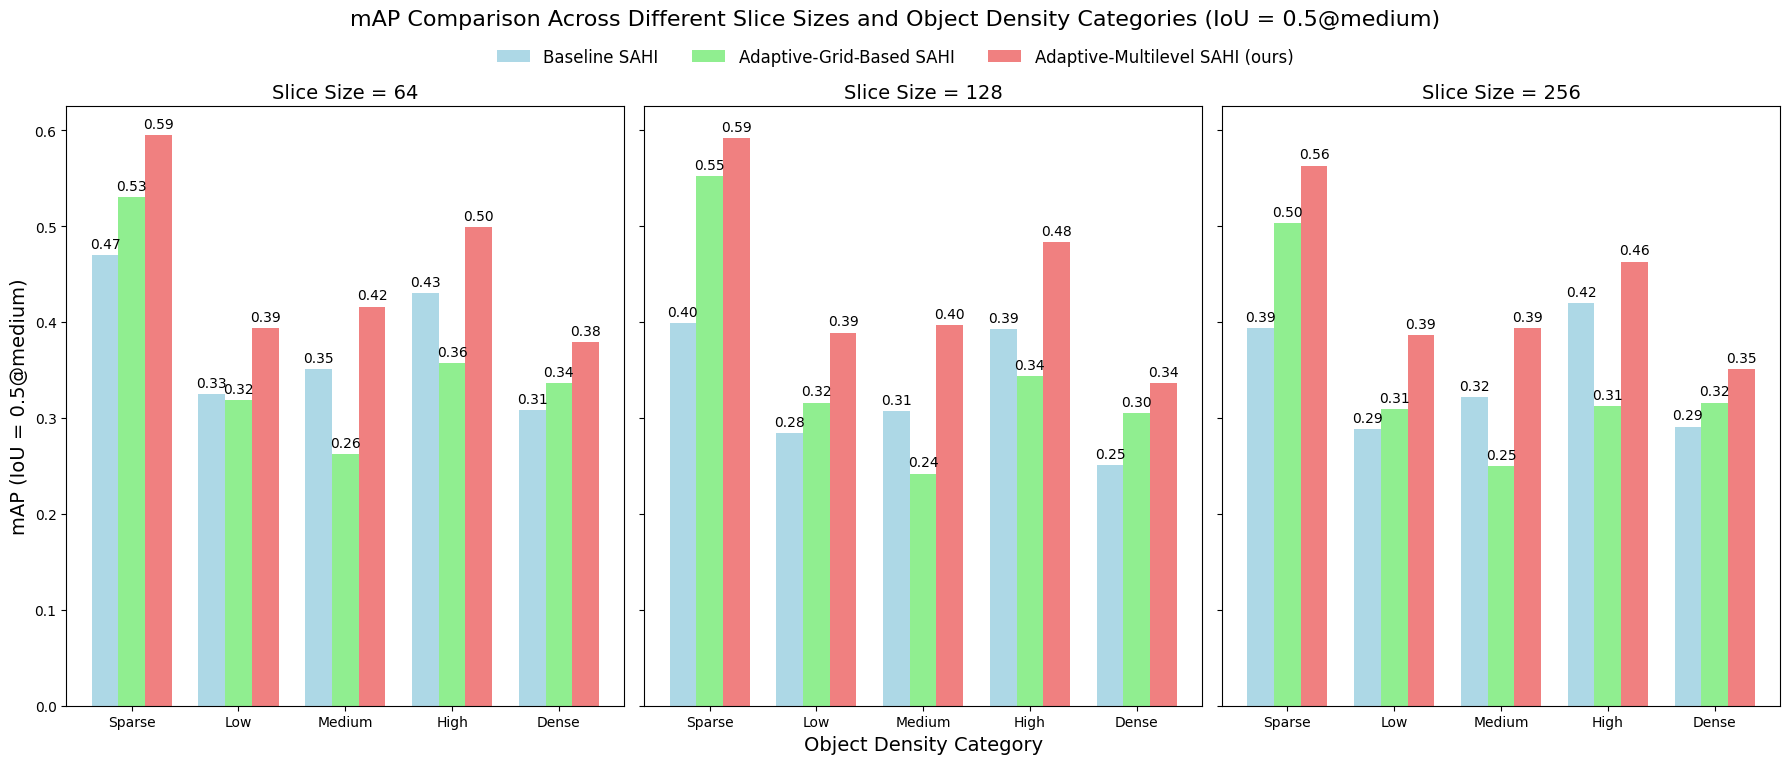

In [4]:
import matplotlib.pyplot as plt

# Apply presentation-friendly font settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 16
})


# Example data for IoU=0.5 and three slice sizes
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]

map_values = {
    64:  {'Baseline SAHI': [0.470, 0.325, 0.351, 0.430, 0.308],
          'Adaptive-Grid-Based SAHI': [0.530, 0.319, 0.262, 0.357, 0.336],
          'Adaptive-Multilevel SAHI': [0.595, 0.394, 0.416, 0.499, 0.379]},
    
    128: {'Baseline SAHI': [0.399, 0.284, 0.307, 0.393, 0.251],
          'Adaptive-Grid-Based SAHI': [0.552, 0.316, 0.242, 0.344, 0.305],
          'Adaptive-Multilevel SAHI': [0.592, 0.389, 0.397, 0.483, 0.336]},
    
    256: {'Baseline SAHI': [0.394, 0.288, 0.322, 0.420, 0.291],
          'Adaptive-Grid-Based SAHI': [0.503, 0.309, 0.250, 0.312, 0.316],
          'Adaptive-Multilevel SAHI': [0.563, 0.386, 0.394, 0.463, 0.351]},
}

colors = ['lightblue', 'lightgreen', 'lightcoral']
bar_width = 0.25
x = range(len(categories))

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 8))

for ax, size in zip(axes, slice_sizes):
    vals = map_values[size]
    bars1 = ax.bar([i - bar_width for i in x], vals['Baseline SAHI'], width=bar_width, color=colors[0], label='Baseline SAHI')
    bars2 = ax.bar(x,                     vals['Adaptive-Grid-Based SAHI'], width=bar_width, color=colors[1], label='Adaptive-Grid-Based SAHI')
    bars3 = ax.bar([i + bar_width for i in x], vals['Adaptive-Multilevel SAHI'], width=bar_width, color=colors[2], label='Adaptive-Multilevel SAHI (ours)')
    
    for bars in (bars1, bars2, bars3):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom')
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_title(f'Slice Size = {size}')
    
    if ax is axes[1]:
        ax.set_xlabel('Object Density Category')
    if ax is axes[0]:
        ax.set_ylabel('mAP (IoU = 0.5@medium)')
       
    #ax.legend()

    
fig.suptitle('mAP Comparison Across Different Slice Sizes and Object Density Categories (IoU = 0.5@medium)', fontsize=16)

# Create a common legend outside, aligned horizontally above the plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.95), frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
output_path = './map_comparison_iou50_medium.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()


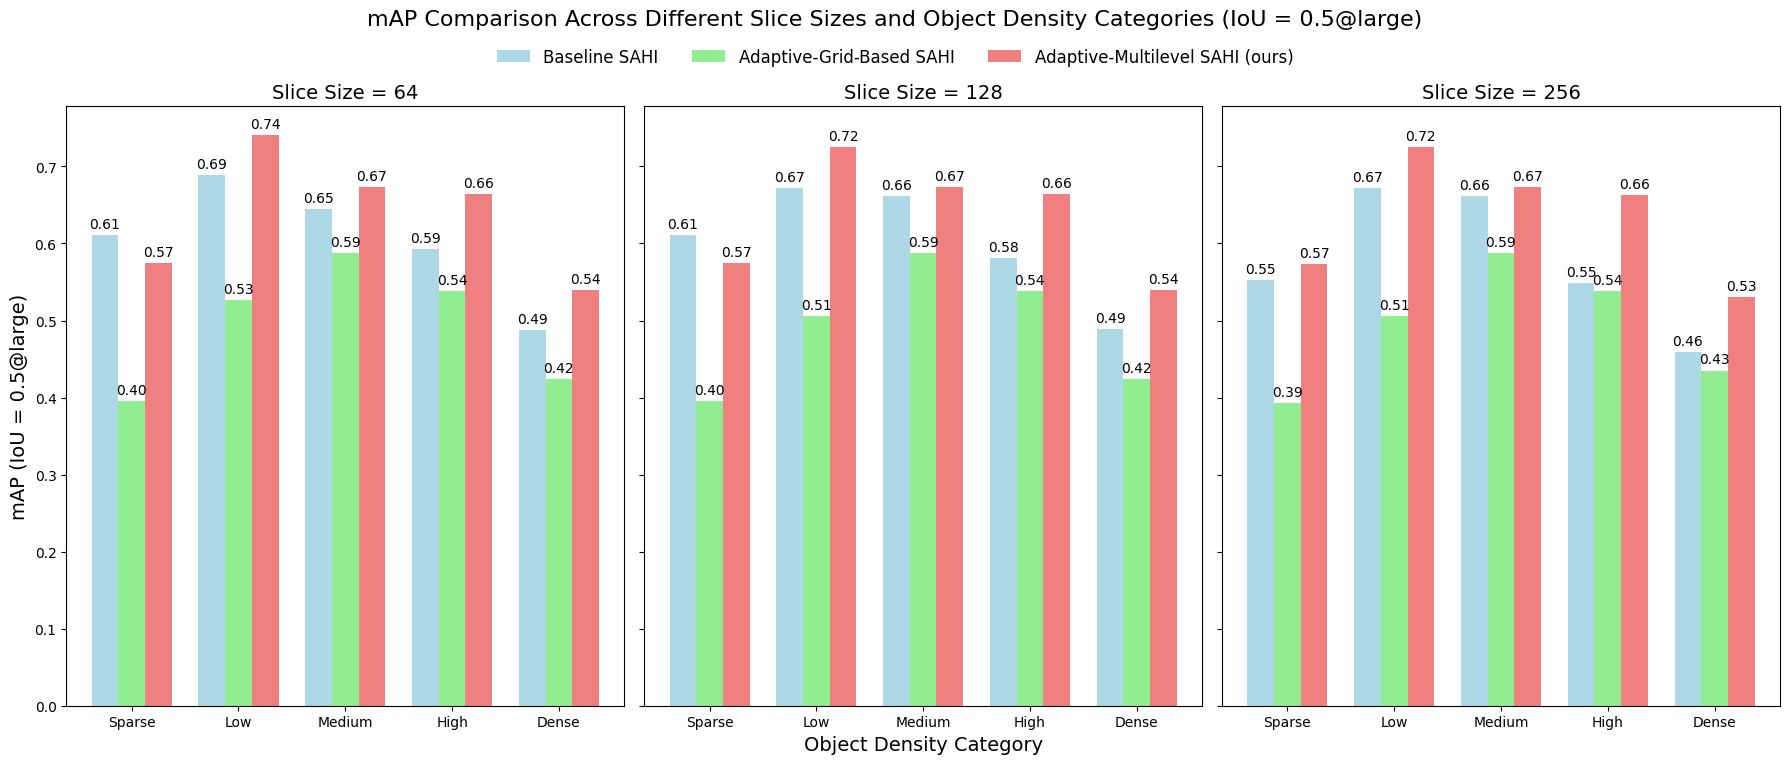

In [5]:
import matplotlib.pyplot as plt

# Apply presentation-friendly font settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 16
})


# Example data for IoU=0.5 and three slice sizes
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]

map_values = {
    64:  {'Baseline SAHI': [0.611, 0.689, 0.645, 0.593, 0.488],
          'Adaptive-Grid-Based SAHI': [0.395, 0.527, 0.588, 0.538, 0.424],
          'Adaptive-Multilevel SAHI': [0.575, 0.741, 0.673, 0.664, 0.539]},
    
    128: {'Baseline SAHI': [0.611, 0.672, 0.662, 0.581, 0.489],
          'Adaptive-Grid-Based SAHI': [0.395, 0.506, 0.588, 0.538, 0.424],
          'Adaptive-Multilevel SAHI': [0.575, 0.725, 0.673, 0.664, 0.539]},
    
    256: {'Baseline SAHI': [0.552, 0.672, 0.662, 0.549, 0.459],
          'Adaptive-Grid-Based SAHI': [0.393, 0.506, 0.588, 0.538, 0.435],
          'Adaptive-Multilevel SAHI': [0.573, 0.725, 0.673, 0.663, 0.530]},
}

colors = ['lightblue', 'lightgreen', 'lightcoral']
bar_width = 0.25
x = range(len(categories))

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 8))

for ax, size in zip(axes, slice_sizes):
    vals = map_values[size]
    bars1 = ax.bar([i - bar_width for i in x], vals['Baseline SAHI'], width=bar_width, color=colors[0], label='Baseline SAHI')
    bars2 = ax.bar(x,                     vals['Adaptive-Grid-Based SAHI'], width=bar_width, color=colors[1], label='Adaptive-Grid-Based SAHI')
    bars3 = ax.bar([i + bar_width for i in x], vals['Adaptive-Multilevel SAHI'], width=bar_width, color=colors[2], label='Adaptive-Multilevel SAHI (ours)')
    
    for bars in (bars1, bars2, bars3):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom')
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_title(f'Slice Size = {size}')
    
    if ax is axes[1]:
        ax.set_xlabel('Object Density Category')
    if ax is axes[0]:
        ax.set_ylabel('mAP (IoU = 0.5@large)')
       
    #ax.legend()

    
fig.suptitle('mAP Comparison Across Different Slice Sizes and Object Density Categories (IoU = 0.5@large)', fontsize=16)

# Create a common legend outside, aligned horizontally above the plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.95), frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
output_path = './map_comparison_iou50_large.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()

#### **Mix of 500 images**

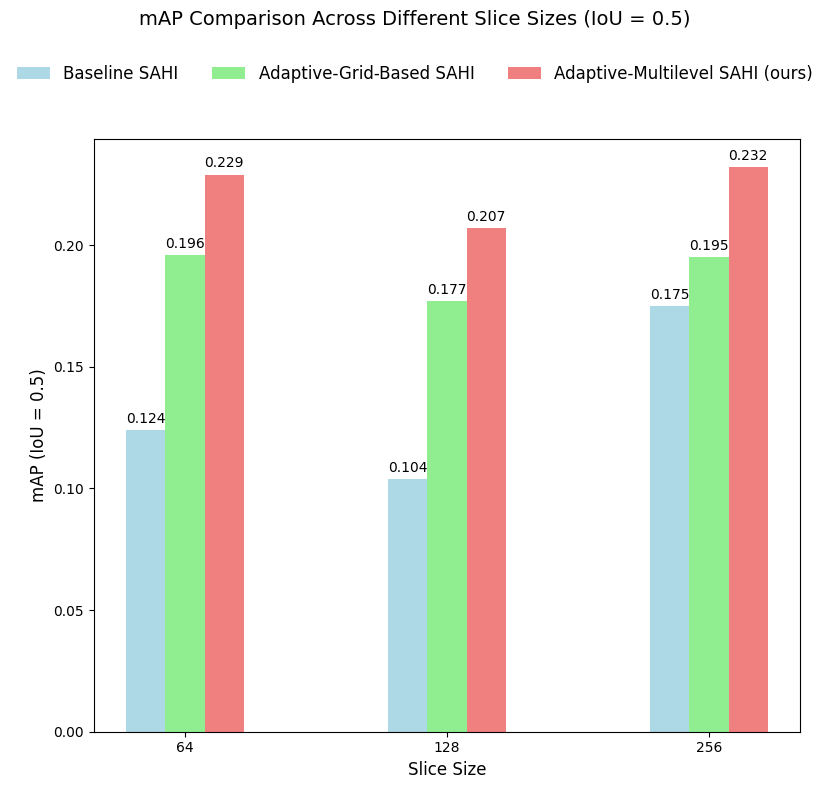

In [24]:
import matplotlib.pyplot as plt

# Apply presentation-friendly font settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 14
})


# Data for IoU=0.5 across slice sizes
slice_sizes = [64, 128, 256]
method_a = [0.124, 0.104, 0.175]
method_b = [0.196, 0.177, 0.195]
method_c = [0.229, 0.207, 0.232]

x = range(len(slice_sizes))
bar_width = 0.15  # Thinner bars
colors = ['lightblue', 'lightgreen', 'lightcoral']

fig, ax = plt.subplots(figsize=(8, 8))

# Plot bars
bars1 = ax.bar([i - bar_width for i in x], method_a, width=bar_width, color=colors[0], label='Baseline SAHI')
bars2 = ax.bar(x,                   method_b, width=bar_width, color=colors[1], label='Adaptive-Grid-Based SAHI')
bars3 = ax.bar([i + bar_width for i in x], method_c, width=bar_width, color=colors[2], label='Adaptive-Multilevel SAHI (ours)')

# Annotate values
for bars in (bars1, bars2, bars3):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(slice_sizes)
ax.set_xlabel('Slice Size')
ax.set_ylabel('mAP (IoU = 0.5)')

# Overall title
fig.suptitle('mAP Comparison Across Different Slice Sizes (IoU = 0.5)', y=0.98)

# Legend directly below title
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.93), frameon=False)

# Adjust layout to accommodate title & legend
plt.tight_layout(rect=[0, 0, 1, 0.88])
output_path = './map_comparison_iou50_mix.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()


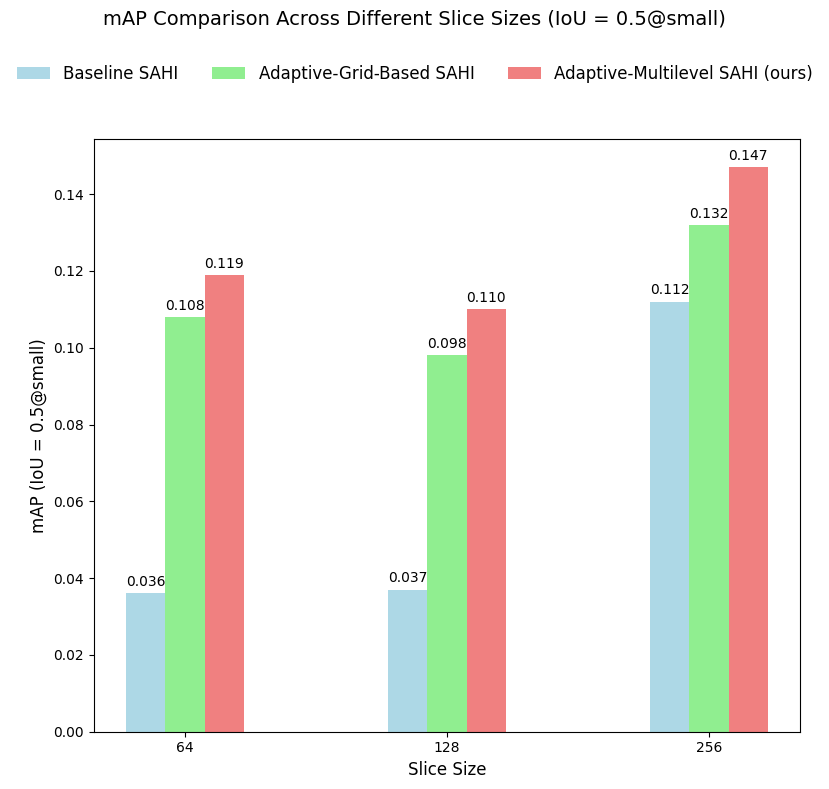

In [31]:
import matplotlib.pyplot as plt

# Apply presentation-friendly font settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 14
})


# Data for IoU=0.5 across slice sizes
slice_sizes = [64, 128, 256]
method_a = [0.036, 0.037, 0.112]
method_b = [0.108, 0.098, 0.132]
method_c = [0.119, 0.110, 0.147]

x = range(len(slice_sizes))
bar_width = 0.15  # Thinner bars
colors = ['lightblue', 'lightgreen', 'lightcoral']

fig, ax = plt.subplots(figsize=(8, 8))

# Plot bars
bars1 = ax.bar([i - bar_width for i in x], method_a, width=bar_width, color=colors[0], label='Baseline SAHI')
bars2 = ax.bar(x,                   method_b, width=bar_width, color=colors[1], label='Adaptive-Grid-Based SAHI')
bars3 = ax.bar([i + bar_width for i in x], method_c, width=bar_width, color=colors[2], label='Adaptive-Multilevel SAHI (ours)')

# Annotate values
for bars in (bars1, bars2, bars3):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(slice_sizes)
ax.set_xlabel('Slice Size')
ax.set_ylabel('mAP (IoU = 0.5@small)')

# Overall title
fig.suptitle('mAP Comparison Across Different Slice Sizes (IoU = 0.5@small)', y=0.98)

# Legend directly below title
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.93), frameon=False)

# Adjust layout to accommodate title & legend
plt.tight_layout(rect=[0, 0, 1, 0.88])
output_path = './map_comparison_iou50_mix_small.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()

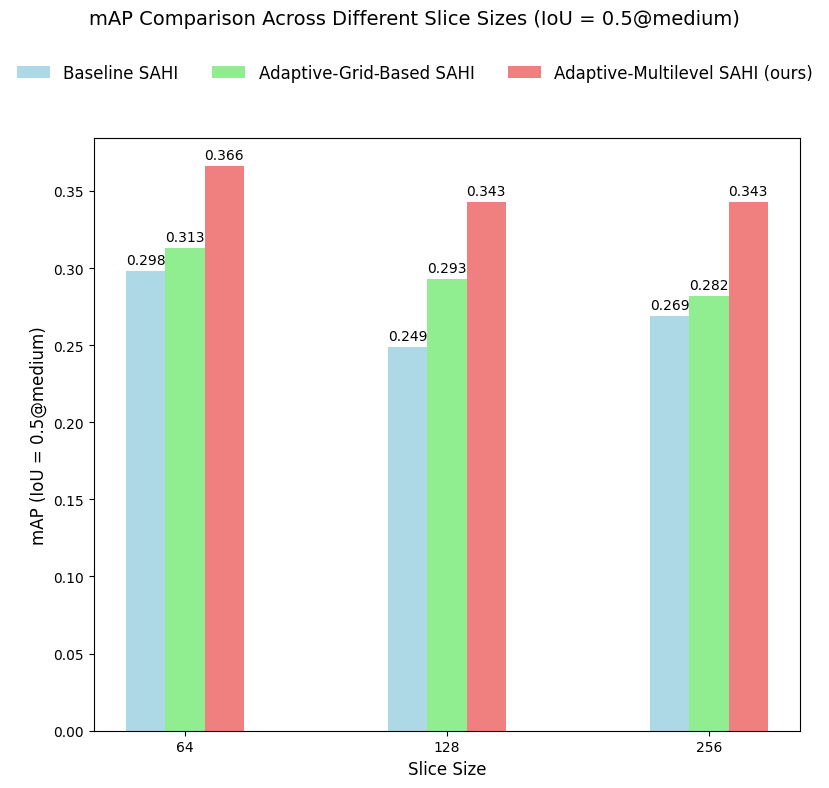

In [30]:
import matplotlib.pyplot as plt

# Apply presentation-friendly font settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 14
})


# Data for IoU=0.5 across slice sizes
slice_sizes = [64, 128, 256]
method_a = [0.298, 0.249, 0.269]
method_b = [0.313, 0.293, 0.282]
method_c = [0.366, 0.343, 0.343]

x = range(len(slice_sizes))
bar_width = 0.15  # Thinner bars
colors = ['lightblue', 'lightgreen', 'lightcoral']

fig, ax = plt.subplots(figsize=(8, 8))

# Plot bars
bars1 = ax.bar([i - bar_width for i in x], method_a, width=bar_width, color=colors[0], label='Baseline SAHI')
bars2 = ax.bar(x,                   method_b, width=bar_width, color=colors[1], label='Adaptive-Grid-Based SAHI')
bars3 = ax.bar([i + bar_width for i in x], method_c, width=bar_width, color=colors[2], label='Adaptive-Multilevel SAHI (ours)')

# Annotate values
for bars in (bars1, bars2, bars3):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(slice_sizes)
ax.set_xlabel('Slice Size')
ax.set_ylabel('mAP (IoU = 0.5@medium)')

# Overall title
fig.suptitle('mAP Comparison Across Different Slice Sizes (IoU = 0.5@medium)', y=0.98)

# Legend directly below title
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.93), frameon=False)

# Adjust layout to accommodate title & legend
plt.tight_layout(rect=[0, 0, 1, 0.88])
output_path = './map_comparison_iou50_mix_medium.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()

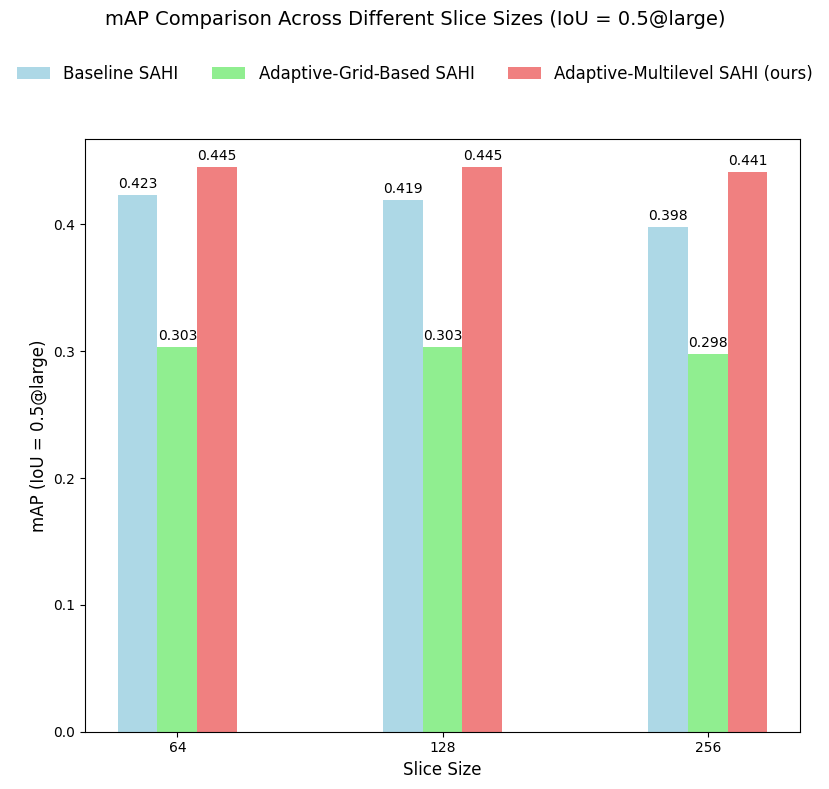

In [29]:
import matplotlib.pyplot as plt

# Apply presentation-friendly font settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 14
})


# Data for IoU=0.5 across slice sizes
slice_sizes = [64, 128, 256]
method_a = [0.423, 0.419, 0.398]
method_b = [0.303, 0.303, 0.298]
method_c = [0.445, 0.445, 0.441]

x = range(len(slice_sizes))
bar_width = 0.15  # Thinner bars
colors = ['lightblue', 'lightgreen', 'lightcoral']

fig, ax = plt.subplots(figsize=(8, 8))

# Plot bars
bars1 = ax.bar([i - bar_width for i in x], method_a, width=bar_width, color=colors[0], label='Baseline SAHI')
bars2 = ax.bar(x,                   method_b, width=bar_width, color=colors[1], label='Adaptive-Grid-Based SAHI')
bars3 = ax.bar([i + bar_width for i in x], method_c, width=bar_width, color=colors[2], label='Adaptive-Multilevel SAHI (ours)')

# Annotate values
for bars in (bars1, bars2, bars3):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(slice_sizes)
ax.set_xlabel('Slice Size')
ax.set_ylabel('mAP (IoU = 0.5@large)')

# Overall title
fig.suptitle('mAP Comparison Across Different Slice Sizes (IoU = 0.5@large)', y=0.98)

# Legend directly below title
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.93), frameon=False)

# Adjust layout to accommodate title & legend
plt.tight_layout(rect=[0, 0, 1, 0.88])
output_path = './map_comparison_iou50_mix_large.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()

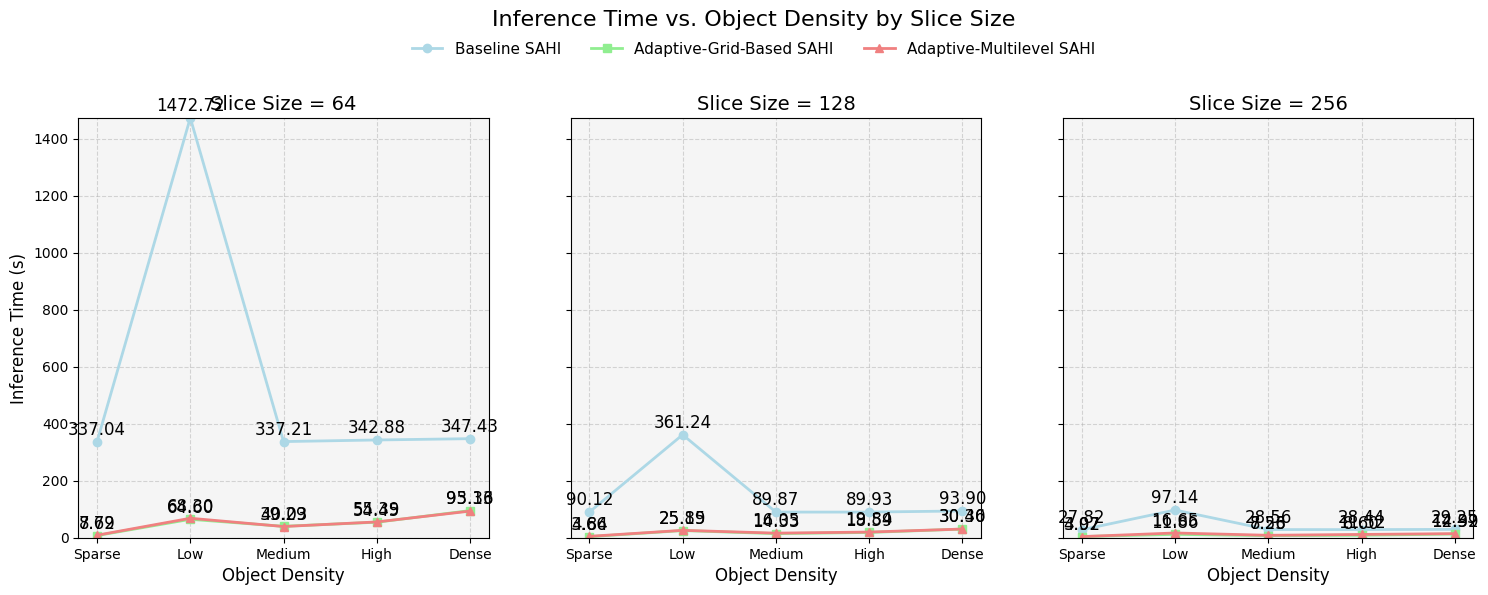

In [47]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
})

# -- Data setup -------------------------------------------------------------
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]
    
times = {
    64:  {'Baseline SAHI': [337.04, 1472.72, 337.21, 342.88, 347.43],
          'Adaptive-Grid-Based SAHI': [7.62, 64.6, 40.03, 54.45, 95.13],
          'Adaptive-Multilevel SAHI': [8.79, 68.3, 39.29, 55.39, 93.36]},
    128: {'Baseline SAHI': [90.12, 361.24, 89.87, 89.93, 93.90],
          'Adaptive-Grid-Based SAHI': [3.66, 25.15, 14.33, 18.59, 30.30],
          'Adaptive-Multilevel SAHI': [4.84, 25.89, 16.05, 19.84, 30.46]},
    256: {'Baseline SAHI': [27.82, 97.14, 28.56, 28.44, 29.25],
          'Adaptive-Grid-Based SAHI': [4.07, 11.86, 7.26, 8.6, 12.99],
          'Adaptive-Multilevel SAHI': [3.92, 16.65, 8.53, 11.52, 14.32]},
}

# Pastel line colors for clarity
line_colors = ['lightblue', 'lightgreen', 'lightcoral']
markers = ['o', 's', '^']

# -- Plotting --------------------------------------------------------------
max_val = max(max(vals) for size in times.values() for vals in size.values())
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, size in zip(axes, slice_sizes):
    #ax.set_facecolor('whitesmoke')
    for color, marker, (method, vals) in zip(line_colors, markers, times[size].items()):
        ax.plot(categories, vals, marker=marker, color=color, label=method, linewidth=2)
        for x, y in zip(categories, vals):
            ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 5),
                        textcoords='offset points', ha='center')
    ax.set_title(f'Slice Size = {size}')
    ax.set_xlabel('Object Density')
    ax.set_ylim(0, max_val + 0.5)
    ax.grid(True, linestyle='--', alpha=0.5)

axes[0].set_ylabel('Inference Time (s)')

# -- Title and Legend -------------------------------------------------------
fig.suptitle('Inference Time vs. Object Density by Slice Size', y=0.98, fontsize=16)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.95), frameon=False)

plt.subplots_adjust(top=0.80, bottom=0.1)
output_path = './inference_comparision.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()


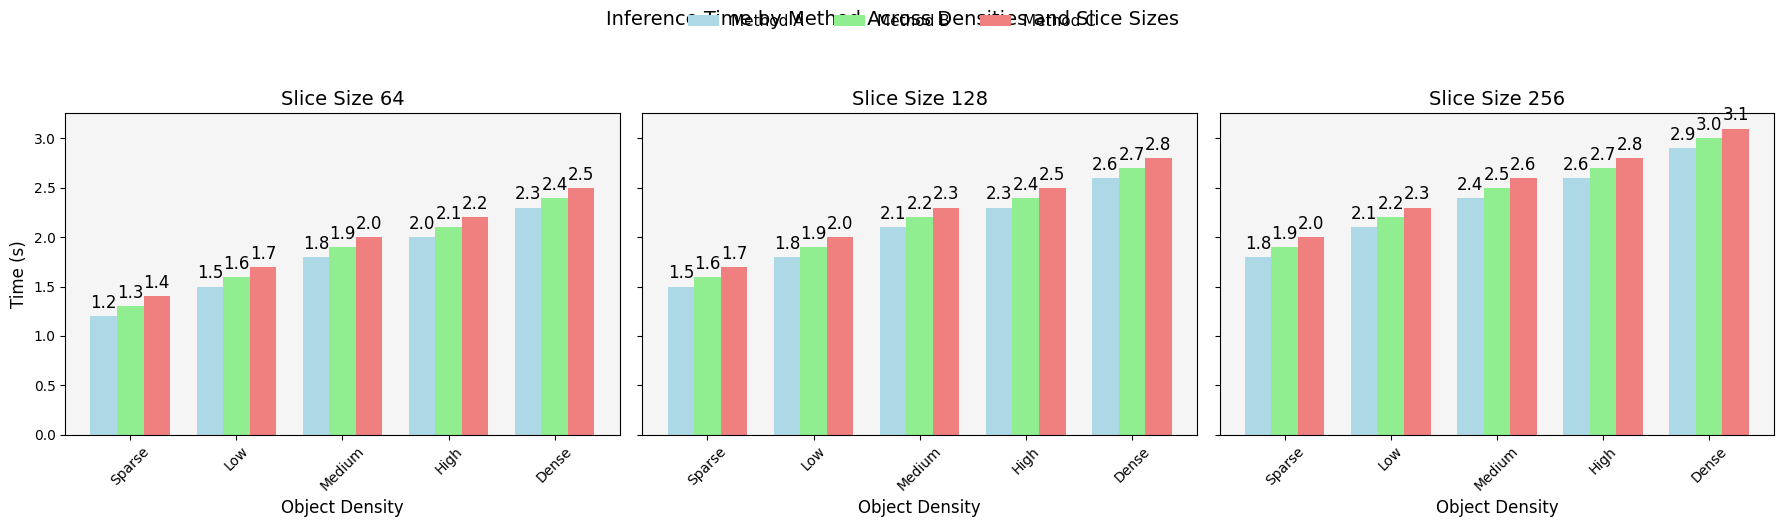

In [66]:
import matplotlib.pyplot as plt

# -- Data setup -------------------------------------------------------------
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]
times = {
    'Sparse': [1.2, 1.5, 1.8],
    'Low':    [1.5, 1.8, 2.1],
    'Medium': [1.8, 2.1, 2.4],
    'High':   [2.0, 2.3, 2.6],
    'Dense':  [2.3, 2.6, 2.9],
}

# -- Styling --------------------------------------------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 11,
})

# -- Plotting per slice size ---------------------------------------------
fig, axes = plt.subplots(1, len(slice_sizes), sharey=True, figsize=(18, 5))
bar_w = 0.25
x = range(len(categories))
colors = ['lightblue', 'lightgreen', 'lightcoral']

for ax, idx, sz in zip(axes, range(len(slice_sizes)), slice_sizes):
    # extract values for this slice size across densities
    vals_A = [times[cat][idx] for cat in categories]
    vals_B = [v + 0.1 for v in vals_A]
    vals_C = [v + 0.2 for v in vals_A]

    ax.bar([i - bar_w for i in x], vals_A,       width=bar_w, color=colors[0], label='Method A')
    ax.bar(x,                     vals_B,       width=bar_w, color=colors[1], label='Method B')
    ax.bar([i + bar_w for i in x], vals_C,       width=bar_w, color=colors[2], label='Method C')

    # annotate bars
    for rect in ax.patches:
        ax.annotate(f'{rect.get_height():.1f}',
                    xy=(rect.get_x() + rect.get_width()/2, rect.get_height()),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45)
    ax.set_title(f'Slice Size {sz}')
    ax.set_xlabel('Object Density')

# -- Legend & Labels -------------------------------------------------------
fig.suptitle('Inference Time by Method Across Densities and Slice Sizes', y=1.05)
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, frameon=False)
axes[0].set_ylabel('Time (s)')

plt.tight_layout()
plt.show()


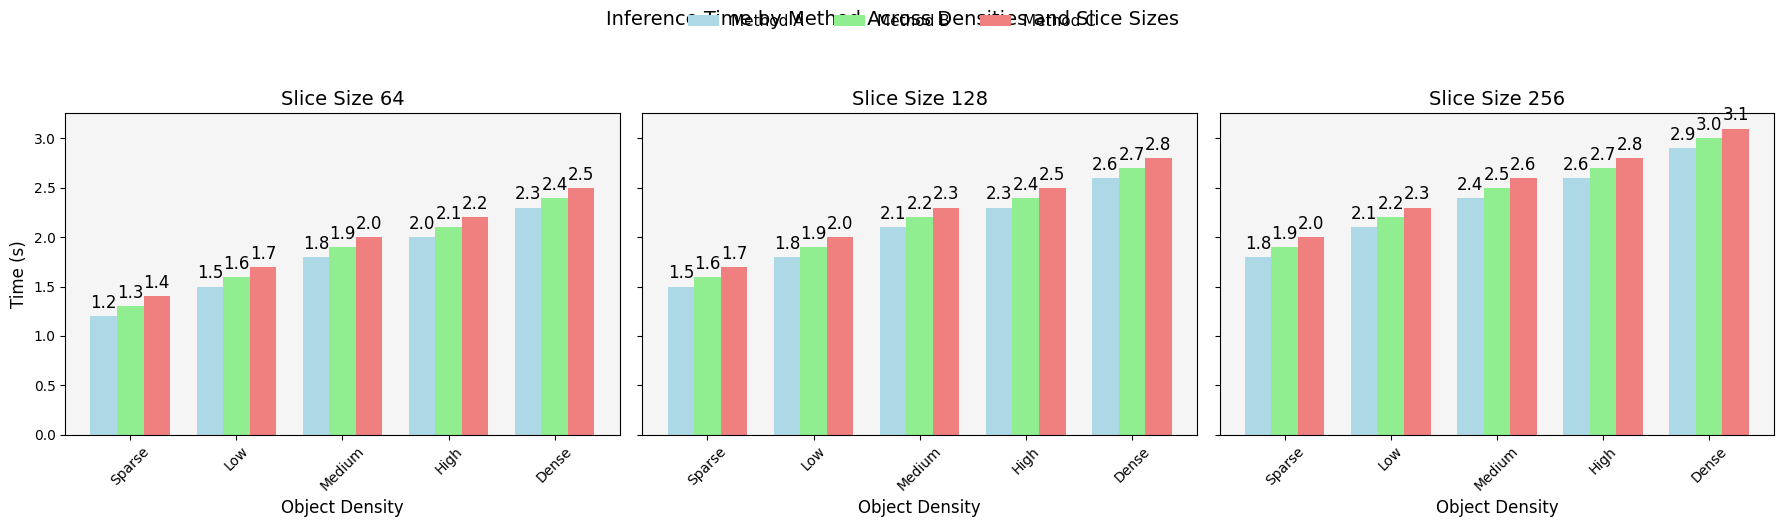

In [64]:
import matplotlib.pyplot as plt

# -- Data setup -------------------------------------------------------------
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]
times = {
    'Sparse': [1.2, 1.5, 1.8],
    'Low':    [1.5, 1.8, 2.1],
    'Medium': [1.8, 2.1, 2.4],
    'High':   [2.0, 2.3, 2.6],
    'Dense':  [2.3, 2.6, 2.9],
}

# -- Styling --------------------------------------------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 11,
})

# -- Plotting per slice size ---------------------------------------------
fig, axes = plt.subplots(1, len(slice_sizes), sharey=True, figsize=(18, 5))
bar_w = 0.25
x = range(len(categories))
colors = ['lightblue', 'lightgreen', 'lightcoral']

for ax, idx, sz in zip(axes, range(len(slice_sizes)), slice_sizes):
    # extract values for this slice size across densities
    vals_A = [times[cat][idx] for cat in categories]
    vals_B = [v + 0.1 for v in vals_A]
    vals_C = [v + 0.2 for v in vals_A]

    ax.bar([i - bar_w for i in x], vals_A,       width=bar_w, color=colors[0], label='Method A')
    ax.bar(x,                     vals_B,       width=bar_w, color=colors[1], label='Method B')
    ax.bar([i + bar_w for i in x], vals_C,       width=bar_w, color=colors[2], label='Method C')

    # annotate bars
    for rect in ax.patches:
        ax.annotate(f'{rect.get_height():.1f}',
                    xy=(rect.get_x() + rect.get_width()/2, rect.get_height()),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45)
    ax.set_title(f'Slice Size {sz}')
    ax.set_xlabel('Object Density')

# -- Legend & Labels -------------------------------------------------------
fig.suptitle('Inference Time by Method Across Densities and Slice Sizes', y=1.05)
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, frameon=False)
axes[0].set_ylabel('Time (s)')

plt.tight_layout()
plt.show()

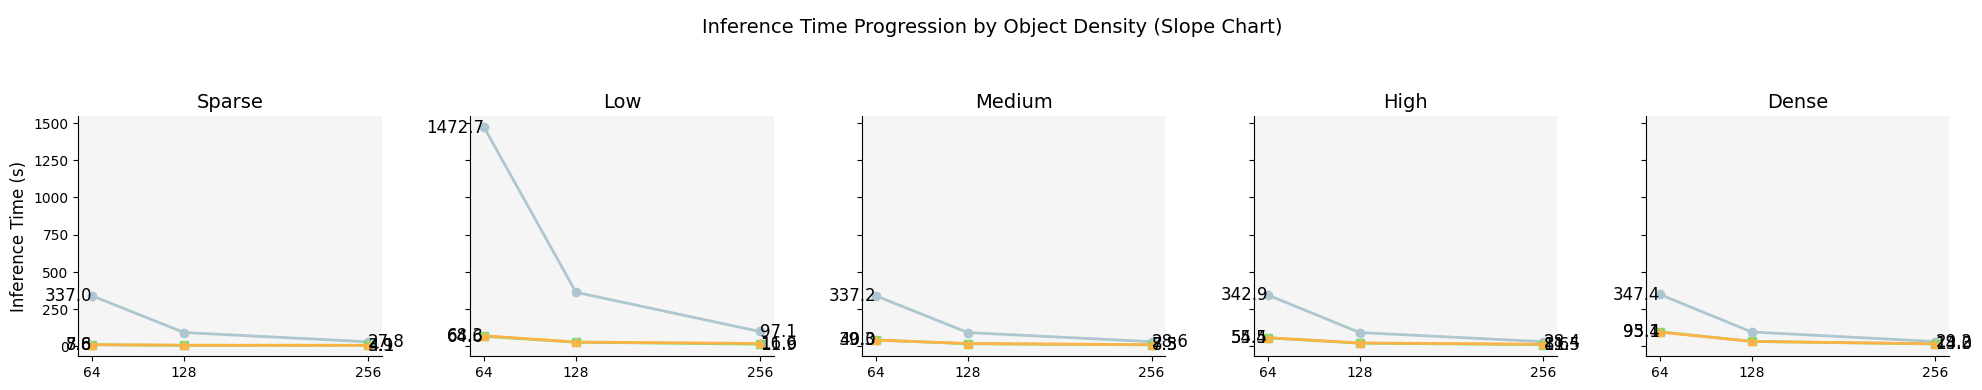

In [59]:
import matplotlib.pyplot as plt

# Styling
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
})

# Data
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]
times = {
    64:  {'Baseline SAHI': [337.04, 1472.72, 337.21, 342.88, 347.43],
          'Adaptive-Grid-Based SAHI': [7.62, 64.6, 40.03, 54.45, 95.13],
          'Adaptive-Multilevel SAHI': [8.79, 68.3, 39.29, 55.39, 93.36]},
    128: {'Baseline SAHI': [90.12, 361.24, 89.87, 89.93, 93.90],
          'Adaptive-Grid-Based SAHI': [3.66, 25.15, 14.33, 18.59, 30.30],
          'Adaptive-Multilevel SAHI': [4.84, 25.89, 16.05, 19.84, 30.46]},
    256: {'Baseline SAHI': [27.82, 97.14, 28.56, 28.44, 29.25],
          'Adaptive-Grid-Based SAHI': [4.07, 11.86, 7.26, 8.6, 12.99],
          'Adaptive-Multilevel SAHI': [3.92, 16.65, 8.53, 11.52, 14.32]},
}

methods = ['Baseline SAHI', 'Adaptive-Grid-Based SAHI', 'Adaptive-Multilevel SAHI']
colors = ['#AEC6CF', '#77DD77', '#FFB347']
markers = ['o', 's', '^']

# Create slope chart as small multiples
fig, axes = plt.subplots(1, len(categories), figsize=(20, 4), sharey=True)
for ax, density in zip(axes, categories):
    idx = categories.index(density)
    for method, color, marker in zip(methods, colors, markers):
        y = [times[s][method][idx] for s in slice_sizes]
        ax.plot(slice_sizes, y, color=color, marker=marker, linewidth=2)
        # annotate endpoints
        ax.text(slice_sizes[0], y[0], f'{y[0]:.1f}', va='center', ha='right')
        ax.text(slice_sizes[-1], y[-1], f'{y[-1]:.1f}', va='center', ha='left')
    ax.set_xticks(slice_sizes)
    ax.set_title(density)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

axes[0].set_ylabel('Inference Time (s)')

# Title and common legend
fig.suptitle('Inference Time Progression by Object Density (Slope Chart)', y=0.95)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.99), frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()


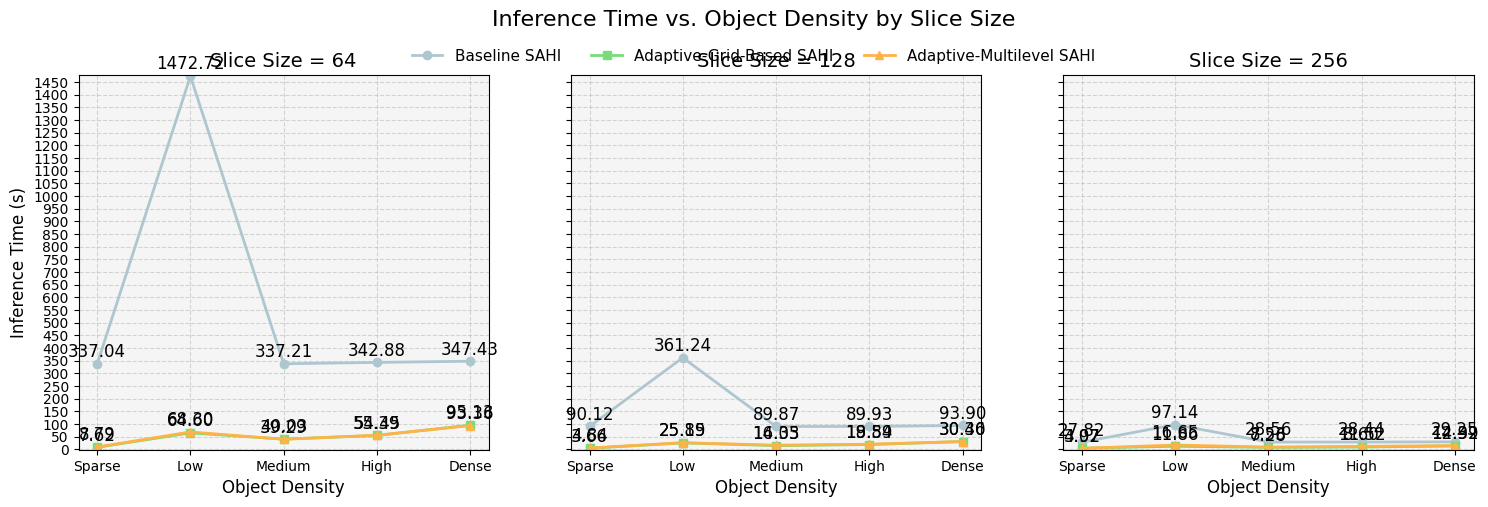

In [55]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# -- Apply a light style and background colors --------------------------------

plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'whitesmoke',
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
})

# -- Data setup -------------------------------------------------------------
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]
times = {
    64:  {'Baseline SAHI': [337.04, 1472.72, 337.21, 342.88, 347.43],
          'Adaptive-Grid-Based SAHI': [7.62, 64.6, 40.03, 54.45, 95.13],
          'Adaptive-Multilevel SAHI': [8.79, 68.3, 39.29, 55.39, 93.36]},
    128: {'Baseline SAHI': [90.12, 361.24, 89.87, 89.93, 93.90],
          'Adaptive-Grid-Based SAHI': [3.66, 25.15, 14.33, 18.59, 30.30],
          'Adaptive-Multilevel SAHI': [4.84, 25.89, 16.05, 19.84, 30.46]},
    256: {'Baseline SAHI': [27.82, 97.14, 28.56, 28.44, 29.25],
          'Adaptive-Grid-Based SAHI': [4.07, 11.86, 7.26, 8.6, 12.99],
          'Adaptive-Multilevel SAHI': [3.92, 16.65, 8.53, 11.52, 14.32]},
}

# -- Determine global min and max for dynamic padding ----------------------
all_values = [value for size in times.values() for vals in size.values() for value in vals]
min_val = min(all_values)
max_val = max(all_values)
padding = 5.5  # fixed padding

# -- Plotting --------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
line_colors = ['#AEC6CF', '#77DD77', '#FFB347']
markers = ['o', 's', '^']

for ax, size in zip(axes, slice_sizes):

    for color, marker, (method, vals) in zip(line_colors, markers, times[size].items()):
        ax.plot(categories, vals, marker=marker, color=color, label=method, linewidth=2)
        for x, y in zip(categories, vals):
            ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 5),
                        textcoords='offset points', ha='center')
    ax.set_title(f'Slice Size = {size}')
    ax.set_xlabel('Object Density')
    # 1) Set your y-limits as before (or let them auto-scale):
    ax.set_ylim(min_val - padding, max_val + padding)

    # 2) Then add a MultipleLocator for major ticks every 50:
    ax.yaxis.set_major_locator(MultipleLocator(50))
    
    ax.grid(True, linestyle='--', alpha=0.5)

axes[0].set_ylabel('Inference Time (s)')

# -- Title and Legend -------------------------------------------------------
fig.suptitle('Inference Time vs. Object Density by Slice Size', y=0.98, fontsize=16)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.93), frameon=False)

plt.subplots_adjust(top=0.85, bottom=0.1)
plt.show()


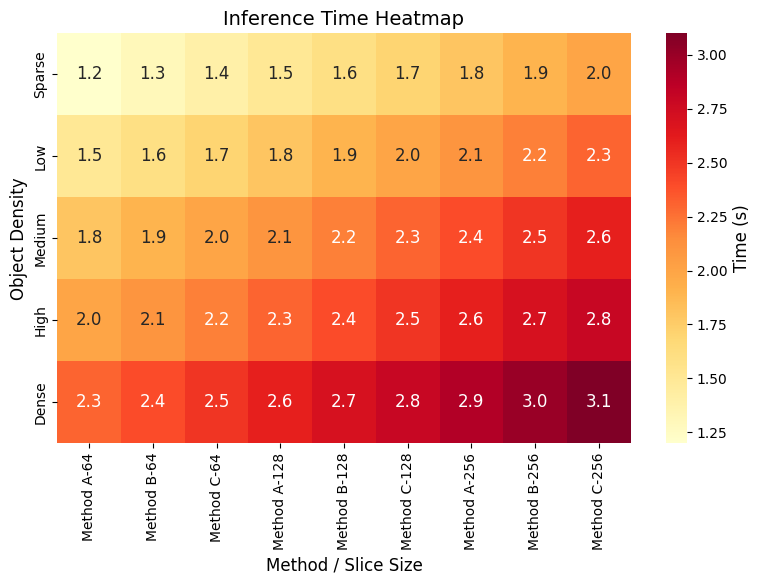

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example inference times for 3 methods × 3 slice sizes × 5 densities
data = {
    ('Method A', 64):  [1.2, 1.5, 1.8, 2.0, 2.3],
    ('Method B', 64):  [1.3, 1.6, 1.9, 2.1, 2.4],
    ('Method C', 64):  [1.4, 1.7, 2.0, 2.2, 2.5],
    ('Method A', 128): [1.5, 1.8, 2.1, 2.3, 2.6],
    ('Method B', 128): [1.6, 1.9, 2.2, 2.4, 2.7],
    ('Method C', 128): [1.7, 2.0, 2.3, 2.5, 2.8],
    ('Method A', 256): [1.8, 2.1, 2.4, 2.6, 2.9],
    ('Method B', 256): [1.9, 2.2, 2.5, 2.7, 3.0],
    ('Method C', 256): [2.0, 2.3, 2.6, 2.8, 3.1],
}

# Pivot into a DataFrame indexed by density, columns = (method, slice)
densities = ['Sparse','Low','Medium','High','Dense']
df = pd.DataFrame(data, index=densities)

plt.figure(figsize=(8,6))
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label':'Time (s)'})
plt.title("Inference Time Heatmap")
plt.ylabel("Object Density")
plt.xlabel("Method / Slice Size")
plt.tight_layout()
plt.show()


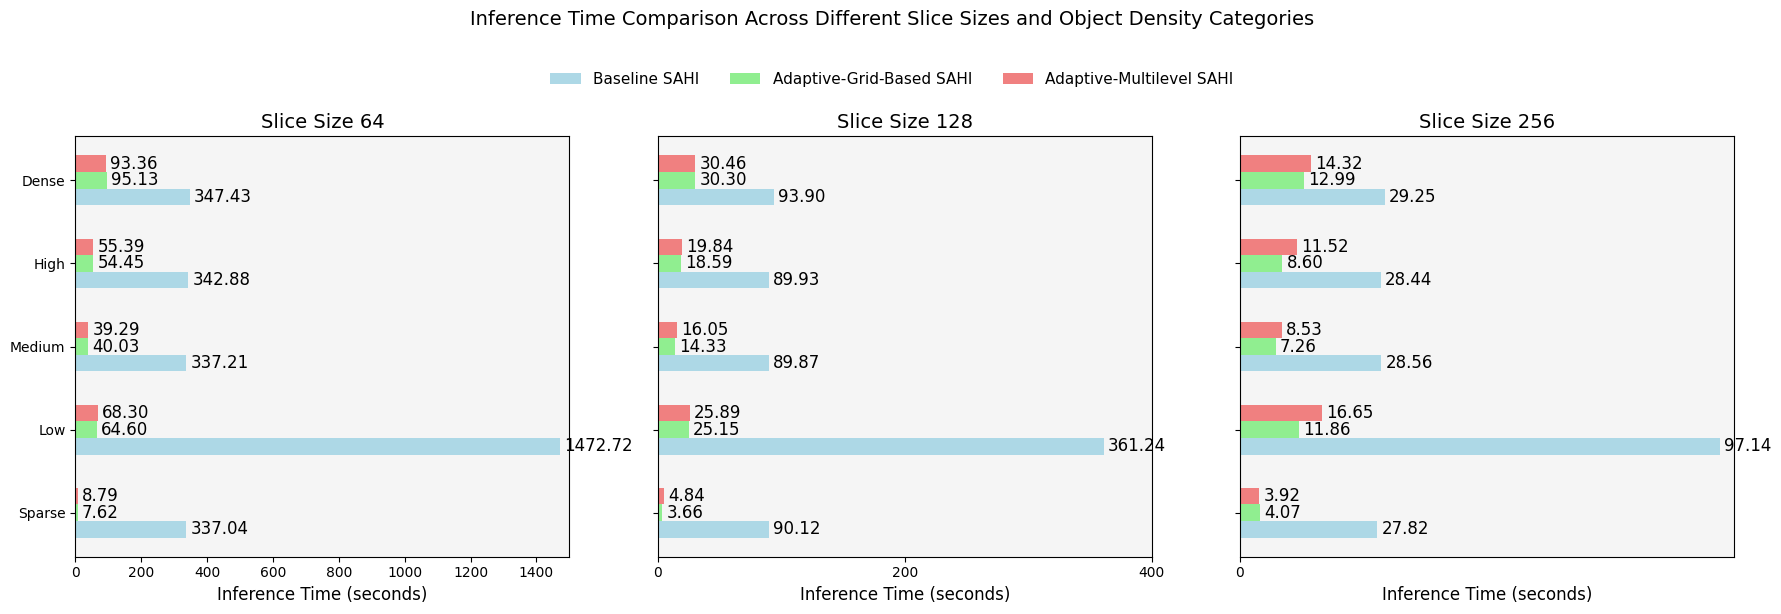

In [93]:
import numpy as np
import math
import matplotlib.pyplot as plt

# -- Data setup -------------------------------------------------------------
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]
times = {
    64:  {'Baseline SAHI': [337.04, 1472.72, 337.21, 342.88, 347.43],
          'Adaptive-Grid-Based SAHI': [7.62, 64.6, 40.03, 54.45, 95.13],
          'Adaptive-Multilevel SAHI': [8.79, 68.3, 39.29, 55.39, 93.36]},
    128: {'Baseline SAHI': [90.12, 361.24, 89.87, 89.93, 93.90],
          'Adaptive-Grid-Based SAHI': [3.66, 25.15, 14.33, 18.59, 30.30],
          'Adaptive-Multilevel SAHI': [4.84, 25.89, 16.05, 19.84, 30.46]},
    256: {'Baseline SAHI': [27.82, 97.14, 28.56, 28.44, 29.25],
          'Adaptive-Grid-Based SAHI': [4.07, 11.86, 7.26, 8.6, 12.99],
          'Adaptive-Multilevel SAHI': [3.92, 16.65, 8.53, 11.52, 14.32]},
}

# -- Styling --------------------------------------------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 11,
})

# -- Plotting horizontal grouped bars for each slice size -----------------
fig, axes = plt.subplots(1, len(slice_sizes), sharey=True, figsize=(18,6))
bar_h = 0.2
y = np.arange(len(categories))
colors = ['lightblue', 'lightgreen', 'lightcoral']

for ax, sz in zip(axes, slice_sizes):
    data = times[sz]
    vals_A = data['Baseline SAHI']
    vals_B = data['Adaptive-Grid-Based SAHI']
    vals_C = data['Adaptive-Multilevel SAHI']

    ax.barh(y - bar_h, vals_A, height=bar_h, color=colors[0], label='Baseline SAHI')
    ax.barh(y,         vals_B, height=bar_h, color=colors[1], label='Adaptive-Grid-Based SAHI')
    ax.barh(y + bar_h, vals_C, height=bar_h, color=colors[2], label='Adaptive-Multilevel SAHI')

    # Annotate bars
    for rect in ax.patches:
        width = rect.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0), textcoords='offset points',
                    va='center', ha='left')

    ax.set_yticks(y)
    ax.set_yticklabels(categories)
    ax.set_title(f'Slice Size {sz}')
    ax.set_xlabel('Inference Time (seconds)')

    # Set x-axis interval of 200
    max_val = max(vals_A + vals_B + vals_C)
    x_max = math.ceil(max_val / 100) * 100
    ax.set_xlim(0, x_max)
    ax.set_xticks(np.arange(0, x_max + 1, 200))

# -- Legend & layout -------------------------------------------------------
fig.suptitle('Inference Time Comparison Across Different Slice Sizes and Object Density Categories', y=1.05)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.97), frameon=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
output_path = './inference_comparision.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()


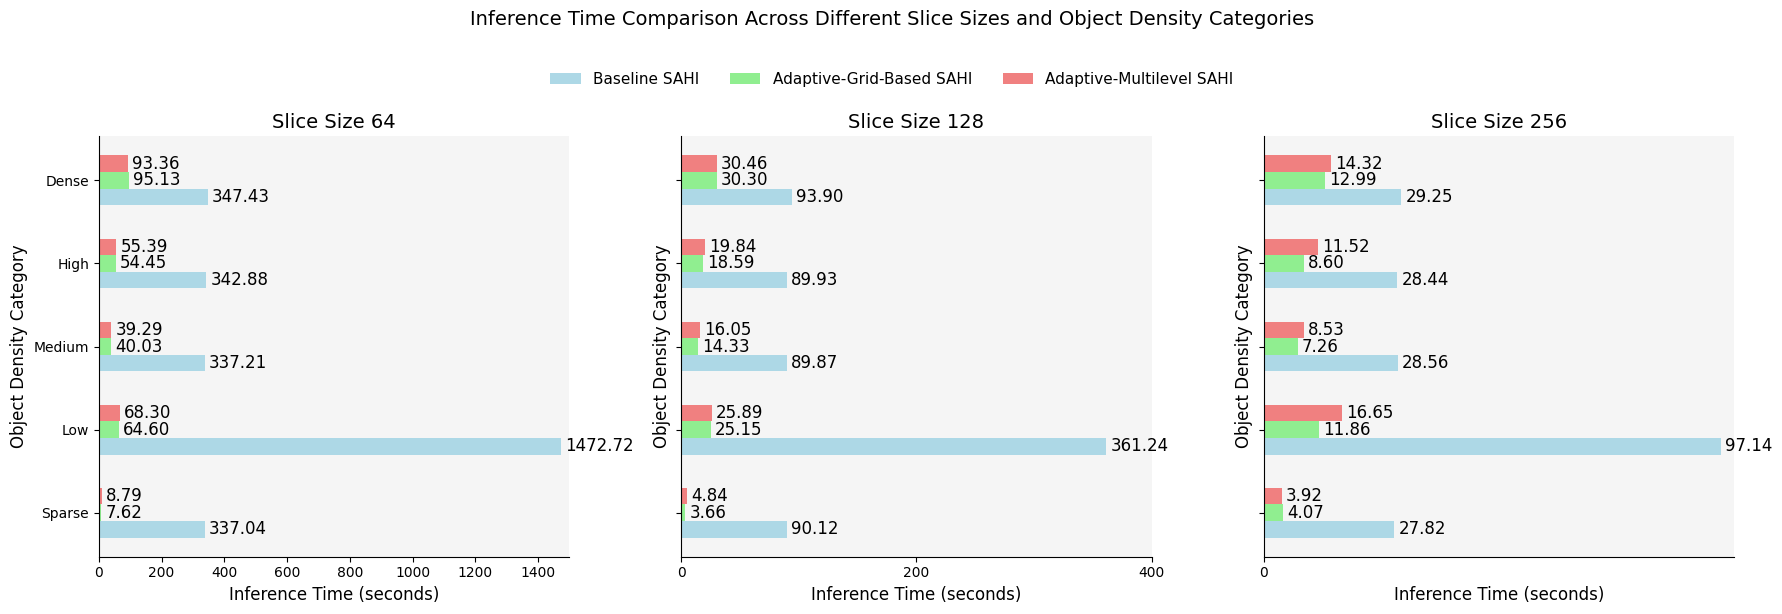

In [98]:
import numpy as np
import math
import matplotlib.pyplot as plt

# -- Data setup -------------------------------------------------------------
categories = ['Sparse', 'Low', 'Medium', 'High', 'Dense']
slice_sizes = [64, 128, 256]
times = {
    64:  {'Baseline SAHI': [337.04, 1472.72, 337.21, 342.88, 347.43],
          'Adaptive-Grid-Based SAHI': [7.62, 64.6, 40.03, 54.45, 95.13],
          'Adaptive-Multilevel SAHI': [8.79, 68.3, 39.29, 55.39, 93.36]},
    128: {'Baseline SAHI': [90.12, 361.24, 89.87, 89.93, 93.90],
          'Adaptive-Grid-Based SAHI': [3.66, 25.15, 14.33, 18.59, 30.30],
          'Adaptive-Multilevel SAHI': [4.84, 25.89, 16.05, 19.84, 30.46]},
    256: {'Baseline SAHI': [27.82, 97.14, 28.56, 28.44, 29.25],
          'Adaptive-Grid-Based SAHI': [4.07, 11.86, 7.26, 8.6, 12.99],
          'Adaptive-Multilevel SAHI': [3.92, 16.65, 8.53, 11.52, 14.32]},
}

# -- Styling --------------------------------------------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 11,
})

# -- Plotting horizontal grouped bars for each slice size -----------------
fig, axes = plt.subplots(1, len(slice_sizes), sharey=True, figsize=(18, 6))
bar_h = 0.2
y = np.arange(len(categories))
colors = ['lightblue', 'lightgreen', 'lightcoral']

for ax, sz in zip(axes, slice_sizes):
    data = times[sz]
    vals_A = data['Baseline SAHI']
    vals_B = data['Adaptive-Grid-Based SAHI']
    vals_C = data['Adaptive-Multilevel SAHI']

    ax.barh(y - bar_h, vals_A, height=bar_h, color=colors[0], label='Baseline SAHI')
    ax.barh(y,         vals_B, height=bar_h, color=colors[1], label='Adaptive-Grid-Based SAHI')
    ax.barh(y + bar_h, vals_C, height=bar_h, color=colors[2], label='Adaptive-Multilevel SAHI')

    # Annotate bars
    for rect in ax.patches:
        width = rect.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0), textcoords='offset points',
                    va='center', ha='left')

    ax.set_yticks(y)
    ax.set_yticklabels(categories)
    ax.set_ylabel('Object Density Category')
    ax.set_title(f'Slice Size {sz}')
    ax.set_xlabel('Inference Time (seconds)')

    # Remove top and right spines, keep only axes lines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

    # Set x-axis interval of 100
    max_val = max(vals_A + vals_B + vals_C)
    x_max = math.ceil(max_val / 100) * 100
    ax.set_xlim(0, x_max)
    ax.set_xticks(np.arange(0, x_max + 1, 200))

# -- Legend & layout -------------------------------------------------------
fig.suptitle('Inference Time Comparison Across Different Slice Sizes and Object Density Categories', y=1.05)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.97), frameon=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
output_path = './inference_comparision.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()

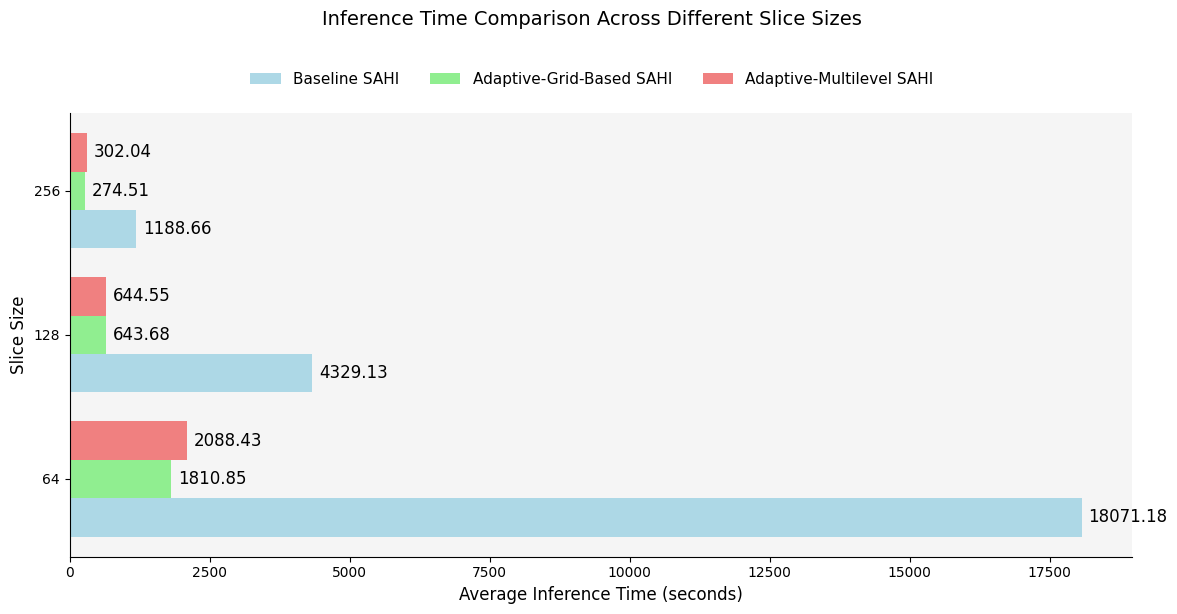

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# -- Data setup -------------------------------------------------------------
slice_sizes = [64, 128, 256]
times = {
    64:  {'Baseline SAHI': [18071.18],
          'Adaptive-Grid-Based SAHI': [1810.85],
          'Adaptive-Multilevel SAHI': [2088.43]},
    
    128: {'Baseline SAHI': [4329.13],
          'Adaptive-Grid-Based SAHI': [643.68],
          'Adaptive-Multilevel SAHI': [644.55]},
    
    256: {'Baseline SAHI': [1188.66],
          'Adaptive-Grid-Based SAHI': [274.51],
          'Adaptive-Multilevel SAHI': [302.04]},
}

# Compute mean inference time across densities for each method
methods = ['Baseline SAHI', 'Adaptive-Grid-Based SAHI', 'Adaptive-Multilevel SAHI']
avg_times = {method: [np.mean(times[sz][method]) for sz in slice_sizes] for method in methods}

# -- Styling --------------------------------------------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'DejaVu Sans'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 11,
})

# -- Plotting horizontal grouped bar chart --------------------------------
fig, ax = plt.subplots(figsize=(12, 6))
y = np.arange(len(slice_sizes))
bar_h = 0.8 / len(methods)
colors = ['lightblue', 'lightgreen', 'lightcoral']

for i, method in enumerate(methods):
    positions = y + (i - 1) * bar_h
    ax.barh(positions, avg_times[method], height=bar_h, color=colors[i], label=method)
    # annotate
    for pos, value in zip(positions, avg_times[method]):
        ax.annotate(f'{value:.2f}',
                    xy=(value, pos),
                    xytext=(5, 0),
                    textcoords='offset points',
                    va='center',
                    ha='left')

# Labels and axes
ax.set_yticks(y)
ax.set_yticklabels(slice_sizes)
ax.set_xlabel('Average Inference Time (seconds)')
ax.set_ylabel('Slice Size')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# -- Title and legend ------------------------------------------------------
fig.suptitle('Inference Time Comparison Across Different Slice Sizes', y=1.05)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3,
           bbox_to_anchor=(0.5, 0.97), frameon=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
output_path = './inference_comparision_mix_500.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')
plt.show()